### Tree-Based Methods

In this chapter, we describe tree-based methods for regression and classifi
cation. These involve stratifying or segmenting the predictor space into a
number of simple regions. In order to make a prediction for a given ob
servation, we typically use the mean or the mode response value for the
training observations in the region to which it belongs. Since the set of
splitting rules used to segment the predictor space can be summarized in
a tree, these types of approaches are known as decision tree methods.
Tree-based methods are simple and useful for interpretation. However,
they typically are not competitive with the best supervised learning ap
proaches, such as those seen in Chapters 6 and 7, in terms of prediction
accuracy. Hence in this chapter we also introduce bagging, random forests,
boosting, and Bayesian additive regression trees. Each of these approaches
involves producing multiple trees which are then combined to yield a single
consensus prediction. We will see that combining a large number of trees
can often result in dramatic improvements in prediction accuracy, at the
expense of some loss in interpretation.

#### The Basics of Decision Trees

Decision trees can be applied to both regression and classification problems.
We first consider regression problems, and then move on to classification.

##### Regression Trees

In order to motivate regression trees, we begin with a simple example.

Predicting Baseball Players’ Salaries Using Regression Trees

We use the Hitters data set to predict a baseball player’s Salary based on
Years (the number of years that he has played in the major leagues) and
Hits (the number of hits that he made in the previous year). We first remove
observations that are missing Salary values, and log-transform Salary so
that its distribution has more of a typical bell-shape. (Recall that Salary
is measured in thousands of dollars.)
Figure 8.1 shows a regression tree fit to this data. It consists of a series
of splitting rules, starting at the top of the tree. The top split assigns
observations having Years<4.5 to the left branch.1 The predicted salary
for these players is given by the mean response value for the players in
the data set with Years<4.5. For such players, the mean log salary is 5.107,
and so we make a prediction of e5.107 thousands of dollars, i.e. $165,174, for
these players. Players with Years>=4.5 are assigned to the right branch, and
then that group is further subdivided by Hits. Overall, the tree stratifies
or segments the players into three regions of predictor space: players who
have played for four or fewer years, players who have played for five or more
years and who made fewer than 118 hits last year, and players who have
played for five or more years and who made at least 118 hits last year. These
three regions can be written as R1 ={X | Years<4.5}, R2 ={X | Years>=4.5,
Hits<117.5}, and R3 ={X | Years>=4.5, Hits>=117.5}. Figure 8.2 illustrates the regions as a function of Years and Hits. The predicted salaries for these
three groups are $1,000 e5.107 =$165,174, $1,000 e5.999 =$402,834, and
$1,000 e6.740 =$845,346 respectively.
In keeping with the tree analogy, the regions R1, R2, and R3 are known as
terminal nodes or leaves of the tree. As is the case for Figure 8.1, decision terminal
trees are typically drawn upside down, in the sense that the leaves are at
the bottom of the tree. The points along the tree where the predictor space
is split are referred to as internal nodes. In Figure 8.1, the two internal internal
nodes are indicated by the text Years<4.5 and Hits<117.5. We refer to the
segments of the trees that connect the nodes as branches.
We might interpret the regression tree displayed in Figure 8.1 as follows:
Years is the most important factor in determining Salary, and players with
less experience earn lower salaries than more experienced players. Given
that a player is less experienced, the number of hits that he made in the
previous year seems to play little role in his salary. But among players who
have been in the major leagues for five or more years, the number of hits
made in the previous year does affect salary, and players who made more
hits last year tend to have higher salaries. The regression tree shown in
Figure 8.1 is likely an over-simplification of the true relationship between
Hits, Years, and Salary. However, it has advantages over other types of
regression models (such as those seen in Chapters 3 and 6): it is easier to
interpret, and has a nice graphical representation.
Prediction via Stratification of the Feature Space
Wenowdiscuss the process of building a regression tree. Roughly speaking,
there are two steps.
1. We divide the predictor space — that is, the set of possible values
for X1,X2,...,Xp — into J distinct and non-overlapping regions,
R1,R2,...,RJ.
2. For every observation that falls into the region Rj, we make the same
prediction, which is simply the mean of the response values for the
training observations in Rj.
For instance, suppose that in Step 1 we obtain two regions, R1 and R2,
and that the response mean of the training observations in the first region
is 10, while the response mean of the training observations in the second
region is 20. Then for a given observation X = x, if x R1 we will predict
a value of 10, and if x R2 we will predict a value of 20.
We now elaborate on Step 1 above. How do we construct the regions
R1,...,RJ? In theory, the regions could have any shape. However, we
choose to divide the predictor space into high-dimensional rectangles, or
boxes, for simplicity and for ease of interpretation of the resulting predic
tive model. The goal is to find boxes R1,...,RJ that minimize the RSS,
given by For instance, suppose that in Step 1 we obtain two regions, $ R_1 $ and $ R_2 $, and that the response mean of the training observations in the first region is 10, while the response mean of the training observations in the second region is 20. Then for a given observation $ X = x $, if $ x \in R_1 $ we will predict a value of 10, and if $ x \in R_2 $ we will predict a value of 20.

We now elaborate on Step 1 above. How do we construct the regions $ R_1, \ldots, R_J $? In theory, the regions could have any shape. However, we choose to divide the predictor space into high-dimensional rectangles, or boxes, for simplicity and for ease of interpretation of the resulting predictive model. The goal is to find boxes $ R_1, \ldots, R_J $ that minimize the RSS, given by

$$
\sum_{j=1}^{J} \sum_{i \in R_j} (y_i - \hat{y}_{R_j})^2,
$$

where $ \hat{y}_{R_j} $ is the mean response for the training observations within the $ j $th box. Unfortunately, it is computationally infeasible to consider every possible partition of the feature space into $ J $ boxes. For this reason, we take a top-down, greedy approach that is known as recursive binary splitting. The approach is top-down because it begins at the top of the tree (at which point all observations belong to a single region) and then successively splits the predictor space; each split is indicated via two new branches further down on the tree. It is greedy because at each step of the tree-building process, the best split is made at that particular step, rather than looking ahead and picking a split that will lead to a better tree in some future step.

In order to perform recursive binary splitting, we first select the predictor $ X_j $ and the cutpoint $ s $ such that splitting the predictor space into the regions $ \{X | X_j < s\} $ and $ \{X | X_j \geq s\} $ leads to the greatest possible reduction in RSS. (The notation $ \{X | X_j < s\} $ means the region of predictor space in which $ X_j $ takes on a value less than $ s $.) That is, we consider all predictors $ X_1, \ldots, X_p $, and all possible values of the cutpoint $ s $ for each of the predictors, and then choose the predictor and cutpoint such that the resulting tree has the lowest RSS. In greater detail, for any $ j $ and $ s $, we define the pair of half-planes

$$
R_1(j,s) = \{X | X_j < s\} \quad \text{and} \quad R_2(j,s) = \{X | X_j \geq s\},
$$

and we seek the value of $ j $ and $ s $ that minimize the equation

$$
\sum_{i: x_i \in R_1(j,s)} (y_i - \hat{y}_{R_1})^2 + \sum_{i: x_i \in R_2(j,s)} (y_i - \hat{y}_{R_2})^2,
$$

where $ \hat{y}_{R_1} $ is the mean response for the training observations in $ R_1(j,s) $, and $ \hat{y}_{R_2} $ is the mean response for the training observations in $ R_2(j,s) $. Finding the values of $ j $ and $ s $ that minimize the above expression can be done quite quickly, especially when the number of features $ p $ is not too large.

Next, we repeat the process, looking for the best predictor and best cutpoint in order to split the data further so as to minimize the RSS within each of the resulting regions. However, this time, instead of splitting the
entire predictor space, we split one of the two previously identified regions.
Wenowhavethree regions. Again, we look to split one of these three regions
further, so as to minimize the RSS. The process continues until a stopping
criterion is reached; for instance, we may continue until no region contains
more than five observations.
Once the regions R1,...,RJ have been created, we predict the response
for a given test observation using the mean of the training observations in
the region to which that test observation belongs.
A five-region example of this approach is shown in Figure 8.3.


Tree Pruning


The process described above may produce good predictions on the training
set, but is likely to overfit the data, leading to poor test set performance.
This is because the resulting tree might be too complex. A smaller tree Variance and better interpretation at the cost of a little bias. One possible alternative to the process described above is to build the tree only so long as the decrease in the RSS due to each split exceeds some (high) threshold. This strategy will result in smaller trees, but is too short-sighted since a seemingly worthless split early on in the tree might be followed by a very good split—that is, a split that leads to a large reduction in RSS later on. Therefore, a better strategy is to grow a very large tree $ T_0 $, and then prune it back in order to obtain a subtree. How do we determine the best way to prune the tree? Intuitively, our goal is to select a subtree that leads to the lowest test error rate. Given a subtree, we can estimate its test error using cross-validation or the validation set approach. However, estimating the cross-validation error for every possible subtree would be too cumbersome, since there is an extremely large number of possible subtrees. Instead, we need a way to select a small set of subtrees for consideration.

Cost complexity pruning—also known as weakest link pruning—gives us a way to do just this. Rather than considering every possible subtree, we consider a sequence of trees indexed by a nonnegative tuning parameter $ \alpha $. For each value of $ \alpha $ there corresponds a subtree $ T \subset T_0 $ such that 

$$
\sum_{m=1}^{|T|} \sum_{i: x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + |\mathcal{T}|\alpha
$$

is as small as possible. Here $ |T| $ indicates the number of terminal nodes of the tree $ T $, $ R_m $ is the rectangle (i.e. the subset of predictor space) corresponding to the $ m $th terminal node, and $ \hat{y}_{R_m} $ is the predicted response associated with $ R_m $—that is, the mean of the training observations in $ R_m $.

The tuning parameter controls a trade-off between the subtree’s complexity and its fit to the training data. When $ \alpha = 0 $, then the subtree $ T $ will simply equal $ T_0 $, because then the above equation just measures the training error. However, as $ \alpha $ increases, there is a price to pay for having a tree with many terminal nodes, and so the quantity will tend to be minimized for a smaller subtree. Equation (8.4) is reminiscent of the lasso (6.7) from Chapter 6, in which a similar formulation was used in order to control the complexity of a linear model.

It turns out that as we increase $ \alpha $ from zero in (8.4), branches get pruned from the tree in a nested and predictable fashion, so obtaining the whole sequence of subtrees as a function of $ \alpha $ is easy. We can select a value of $ \alpha $ using a validation set or using cross-validation. We then return to the full data set and obtain the subtree corresponding to $ \alpha $. This process is summarized in Algorithm 8.1.

Figures 8.4 and 8.5 display the results of fitting and pruning a regression tree on the Hitters data, using nine of the features. First, we randomly divided the data set in half, yielding 132 observations in the training set and 131 observations in the test set. We then built a large regression tree on the training data and varied $ \alpha $ in (8.4) in order to create subtrees with different numbers of terminal nodes. Finally, we performed six-fold cross validation in order to estimate the cross-validated MSE of the trees as a function of $\alpha$. (We chose to perform six-fold cross-validation because 132 is an exact multiple of six.) The unpruned regression tree is shown in Figure 8.4. The green curve in Figure 8.5 shows the CV error as a function of the number of leaves, while the orange curve indicates the test error. Also shown are standard error bars around the estimated errors. For reference, the training error curve is shown in black. The CV error is a reasonable approximation of the test error: the CV error takes on its minimum for a three-node tree, while the test error also dips down at the three-node tree (though it takes on its lowest value at the ten-node tree). The pruned tree containing three terminal nodes is shown in Figure 8.1.



**Algorithm 8.1 $Building$ $a$ $Regression$ $Tree$**

1. Use recursive binary splitting to grow a large tree on the training data, stopping only when each terminal node has fewer than some minimum number of observations.
2. Apply cost complexity pruning to the large tree in order to obtain a sequence of best subtrees, as a function of $ \alpha $.
3. Use K-fold cross-validation to choose $ \alpha $. That is, divide the training observations into K folds. For each $ k = 1, \ldots, K $:
   (a) Repeat Steps 1 and 2 on all but the kth fold of the training data.
   (b) Evaluate the mean squared prediction error on the data in the left-out kth fold, as a function of $ \alpha $. Average the results for each value of $ \alpha $, and pick $ \alpha $ to minimize the average error.
4. Return the subtree from Step 2 that corresponds to the chosen value of $ \alpha $.





##### Classification Trees



A classification tree is very similar to a regression tree, except that it is used to predict a qualitative response rather than a quantitative one. Recall that for a regression tree, the predicted response for an observation is given by the mean response of the training observations that belong to the same terminal node. In contrast, for a classification tree, we predict that each observation belongs to the most commonly occurring class of training observations in the region to which it belongs. In interpreting the results of a classification tree, we are often interested not only in the class prediction corresponding to a particular terminal node region, but also in the class proportions among the training observations that fall into that region.

The task of growing a classification tree is quite similar to the task of growing a regression tree. Just as in the regression setting, we use recursive Binary splitting to grow a classification tree. However, in the classification setting, RSS cannot be used as a criterion for making the binary splits. A natural alternative to RSS is the classification error rate. Since we plan to assign an observation in a given region to the most commonly occurring class of training observations in that region, the classification error rate is simply the fraction of the training observations in that region that do not belong to the most common class:

$$
E = 1 - \max_k (\hat{p}_{mk}).
$$

Here $ \hat{p}_{mk} $ represents the proportion of training observations in the mth region that are from the kth class. However, it turns out that classification error is not sufficiently sensitive for tree-growing, and in practice two other measures are preferable.

The Gini index is defined by

$$
G = \sum_{k=1}^{K} \hat{p}_{mk}(1 - \hat{p}_{mk}),
$$

a measure of total variance across the K classes. It is not hard to see that the Gini index takes on a small value if all of the $ \hat{p}_{mk} $s are close to zero or one. For this reason, the Gini index is referred to as a measure of Node purity—a small value indicates that a node contains predominantly observations from a single class.

An alternative to the Gini index is entropy, given by

$$
D = -\sum_{k=1}^{K} \hat{p}_{mk} \log \hat{p}_{mk}.
$$

Since $0 \leq \hat{p}_{mk} \leq 1$, it follows that $0 \leq -\hat{p}_{mk} \log \hat{p}_{mk}$. One can show that the entropy will take on a value near zero if the $\hat{p}_{mk}$s are all near zero or near one. Therefore, like the Gini index, the entropy will take on a small value if the mth node is pure. In fact, it turns out that the Gini index and the entropy are quite similar numerically.

When building a classification tree, either the Gini index or the entropy are typically used to evaluate the quality of a particular split, since these two approaches are more sensitive to node purity than is the classification error rate. Any of these three approaches might be used when pruning the tree, but the classification error rate is preferable if prediction accuracy of the final pruned tree is the goal.

Figure 8.6 shows an example on the Heart data set. These data contain a binary outcome HD for 303 patients who presented with chest pain. An outcome value of Yes indicates the presence of heart disease based on an angiographic test, while No means no heart disease. There are 13 predictors including Age, Sex, Chol (a cholesterol measurement), and other heart and lung function measurements. Cross-validation results in a tree with six terminal nodes.

In our discussion thus far, we have assumed that the predictor variables take on continuous values. However, decision trees can be constructed even in the presence of qualitative predictor variables. For instance, in the Heart data, some of the predictors, such as Sex, Thal (Thallium stress test), and ChestPain, are qualitative. Therefore, a split on one of these variables
amounts to assigning some of the qualitative values to one branch and
assigning the remaining to the other branch. In Figure 8.6, some of the in
ternal nodes correspond to splitting qualitative variables. For instance, the
top internal node corresponds to splitting Thal. The text Thal:a indicates
that the left-hand branch coming out of that node consists of observations
with the first value of the Thal variable (normal), and the right-hand node
consists of the remaining observations (fixed or reversible defects). The text
ChestPain:bc two splits down the tree on the left indicates that the left-hand
branch coming out of that node consists of observations with the second
and third values of the ChestPain variable, where the possible values are
typical angina, atypical angina, non-anginal pain, and asymptomatic.
Figure 8.6 has a surprising characteristic: some of the splits yield two
terminal nodes that have the same predicted value. For instance, consider
the split RestECG<1 near the bottom right of the unpruned tree. Regardless
of the value of RestECG, a response value of Yes is predicted for those observations. Why, then, is the split performed at all? The split is performed because it leads to increased node purity. That is, all 9 of the observations corresponding to the right-hand leaf have a response value of Yes, whereas 7/11 of those corresponding to the left-hand leaf have a response value of Yes. Why is node purity important? Suppose that we have a test observation that belongs to the region given by that right-hand leaf. Then we can be pretty certain that its response value is Yes. In contrast, if a test observation belongs to the region given by the left-hand leaf, then its response value is probably Yes, but we are much less certain. Even though the split RestECG < 1 does not reduce the classification error, it improves the Gini index and the entropy, which are more sensitive to node purity.



##### Trees Versus Linear Models



Regression and classification trees have a very different flavor from the more classical approaches for regression and classification presented in Chapters 3 and 4. In particular, linear regression assumes a model of the form

$$
f(X) = \beta_0 + \sum_{j=1}^{p} X_j \beta_j,
$$

whereas regression trees assume a model of the form

$$
f(X) = \sum_{m=1}^{M} c_m \cdot \mathbb{1}(X \in R_m)
$$

where $ R_1, \ldots, R_M $ represent a partition of feature space, as in Figure 8.3. Which model is better? It depends on the problem at hand. If the relationship between the features and the response is well approximated by a linear model as in (8.8), then an approach such as linear regression will likely work well, and will outperform a method such as a regression tree that does not exploit this linear structure. If instead there is a highly non-linear and complex relationship between the features and the response as indicated by model (8.9), then decision trees may outperform classical approaches. An illustrative example is displayed in Figure 8.7. The relative performances of tree-based and classical approaches can be assessed by estimating the test error, using either cross-validation or the validation set approach (Chapter 5).

Of course, other considerations beyond simply test error may come into play in selecting a statistical learning method; for instance, in certain settings, prediction using a tree may be preferred for the sake of interpretability and visualization.


##### Advantages and Disadvantages of Trees

Decision trees for regression and classification have a number of advantages over the more classical approaches seen in Chapters 3 and 4:

- Trees are very easy to explain to people. In fact, they are even easier to explain than linear regression!
- Some people believe that decision trees more closely mirror human
decision-making than do the regression and classification approaches
seen in previous chapters.
- Trees can be displayed graphically, and are easily interpreted even by
a non-expert (especially if they are small).
- Trees can easily handle qualitative predictors without the need to
create dummy variables.
- Unfortunately, trees generally do not have the same level of predictive
accuracy as some of the other regression and classification approaches
seen in this book.
- Additionally, trees can be very non-robust. In other words, a small
change in the data can cause a large change in the final estimated
tree.

However, by aggregating many decision trees, using methods like bagging,
random forests, and boosting, the predictive performance of trees can be
substantially improved. We introduce these concepts in the next section.


#### Bagging, Random Forests, Boosting, and Bayesian Additive Regression Trees

An ensemble method is an approach that combines many simple “building block” models in order to obtain a single and potentially very powerful model. These simple building block models are sometimes known as weak learners, since they may lead to mediocre predictions on their own. 

We will now discuss bagging, random forests, boosting, and Bayesian additive regression trees. These are ensemble methods for which the simple building block is a regression or a classification tree.



#### Bagging

The bootstrap, introduced in Chapter 5, is an extremely powerful idea. It is used in many situations in which it is hard or even impossible to directly compute the standard deviation of a quantity of interest. We see here that the bootstrap can be used in a completely different context, in order to improve statistical learning methods such as decision trees.

The decision trees discussed in Section 8.1 suffer from high variance. This means that if we split the training data into two parts at random, and fit a decision tree to both halves, the results that we get could be quite different. In contrast, a procedure with low variance will yield similar results if applied repeatedly to distinct data sets; linear regression tends to have low variance, if the ratio of $ n $ to $ p $ is moderately large. Bootstrap weak learners aggregation, or bagging, is a general-purpose procedure for reducing the variance of a statistical learning method; we introduce it here because it is particularly useful and frequently used in the context of decision trees.

Recall that given a set of $ n $ independent observations $ Z_1, \ldots, Z_n $, each with variance $ \sigma^2 $, the variance of the mean $ \bar{Z} $ of the observations is given by $ \sigma^2/n $. In other words, averaging a set of observations reduces variance. Hence a natural way to reduce the variance and increase the test set accuracy of a statistical learning method is to take many training sets from the population, build a separate prediction model using each training set, and average the resulting predictions. In other words, we could calculate $ \hat{f}_1(x), \hat{f}_2(x), \ldots, \hat{f}_B(x) $ using $ B $ separate training sets, and average them in order to obtain a single low-variance statistical learning model, given by

$$
\hat{f}_{avg}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat{f}_b(x).
$$

Of course, this is not practical because we generally do not have access to multiple training sets. Instead, we can bootstrap, by taking repeated samples from the (single) training data set. In this approach, we generate $ B $ different bootstrapped training data sets. We then train our method on the $ b $-th bootstrapped training set in order to get $ \hat{f}_b(x) $, and finally average all the predictions, to obtain

$$
\hat{f}_{bag}(x) = \frac{1}{B} \sum_{b=1}^{B} \hat{f}_b(x).
$$

This is called bagging.

While bagging can improve predictions for many regression methods,
it is particularly useful for decision trees. To apply bagging to regression
trees, we simply construct B regression trees using B bootstrapped training
sets, and average the resulting predictions. These trees are grown deep,
and are not pruned. Hence each individual tree has high variance, but
low bias. Averaging these B trees reduces the variance. Bagging has been
demonstrated to give impressive improvements in accuracy by combining
together hundreds or even thousands of trees into a single procedure.

Thus far, we have described the bagging procedure in the regression
context, to predict a quantitative outcome Y . How can bagging be extended
to a classification problem where Y is qualitative? In that situation, there
are a few possible approaches, but the simplest is as follows. For a given test
observation, we can record the class predicted by each of the B trees, and
take a majority vote: the overall prediction is the most commonly occurring
class among the B predictions.

Figure 8.8 shows the results from bagging trees on the Heart data. The
test error rate is shown as a function of B, the number of trees constructed
using bootstrapped training data sets. We see that the bagging test error
rate is slightly lower in this case than the test error rate obtained from a
single tree. The number of trees B is not a critical parameter with bagging;
using a very large value of B will not lead to overfitting. In practice we use a value of B sufficiently large that the error has settled down. Using
B =100 is sufficient to achieve good performance in this example.


Out-of-Bag Error Estimation

It turns out that there is a very straightforward way to estimate the test
error of a bagged model, without the need to perform cross-validation or
the validation set approach. Recall that the key to bagging is that trees are
repeatedly fit to bootstrapped subsets of the observations. One can show
that on average, each bagged tree makes use of around two-thirds of the
observations.3 The remaining one-third of the observations not used to fit a
given bagged tree are referred to as the out-of-bag (OOB) observations. We 
can predict the response for the ith observation using each of the trees in
which that observation was OOB. This will yield around B/3 predictions
for the ith observation. In order to obtain a single prediction for the ith
observation, we can average these predicted responses (if regression is the
goal) or can take a majority vote (if classification is the goal). This leads
to a single OOB prediction for the ith observation. An OOB prediction
can be obtained in this way for each of the n observations, from which the
overall OOB MSE (for a regression problem) or classification error (for a
classification problem) can be computed. The resulting OOB error is a valid
estimate of the test error for the bagged model, since the response for each
observation is predicted using only the trees that were not fit using that
observation. Figure 8.8 displays the OOB error on the Heart data. It can
be shown that with B sufficiently large, OOB error is virtually equivalent
to leave-one-out cross-validation error. The OOB approach for estimating
the test error is particularly convenient when performing bagging on large
data sets for which cross-validation would be computationally onerous.

Variable Importance Measures

As we have discussed, bagging typically results in improved accuracy over
prediction using a single tree. Unfortunately, however, it can be difficult to
interpret the resulting model. Recall that one of the advantages of decision
trees is the attractive and easily interpreted diagram that results, such as
the one displayed in Figure 8.1. However, when we bag a large number of
trees, it is no longer possible to represent the resulting statistical learning
procedure using a single tree, and it is no longer clear which variables
are most important to the procedure. Thus, bagging improves prediction
accuracy at the expense of interpretability.

Although the collection of bagged trees is much more difficult to interpret
than a single tree, one can obtain an overall summary of the importance of
each predictor using the RSS (for bagging regression trees) or the Gini index
(for bagging classification trees). In the case of bagging regression trees, we
can record the total amount that the RSS (8.1) is decreased due to splits
over a given predictor, averaged over all B trees. A large value indicates
an important predictor. Similarly, in the context of bagging classification trees, we can add up the total amount that the Gini index (8.6) is decreased
by splits over a given predictor, averaged over all B trees.

A graphical representation of the variable importances in the Heart data variable
is shown in Figure 8.9. We see the mean decrease in Gini index for each vari
able, relative to the largest. The variables with the largest mean decrease
in Gini index are Thal, Ca, and ChestPain.

#### Random Forests

Random forests provide an improvement over bagged trees by way of a random
small tweak that decorrelates the trees. As in bagging, we build a number
of decision trees on bootstrapped training samples. But when building these
decision trees, each time a split in a tree is considered, a random sample of
m predictors is chosen as split candidates from the full set of p predictors.
The split is allowed to use only one of those m predictors. A fresh sample of
mpredictors is taken at each split, and typically we choose m 
p—that
is, the number of predictors considered at each split is approximately equal
to the square root of the total number of predictors (4 out of the 13 for the
Heart data).

In other words, in building a random forest, at each split in the tree,
the algorithm is not even allowed to consider a majority of the available
predictors. This may sound crazy, but it has a clever rationale. Suppose
that there is one very strong predictor in the data set, along with a num
ber of other moderately strong predictors. Then in the collection of bagged
trees, most or all of the trees will use this strong predictor in the top split.
Consequently, all of the bagged trees will look quite similar to each other.

Hence the predictions from the bagged trees will be highly correlated. Unfortunately, averaging many highly correlated quantities does not lead to as large of a reduction in variance as averaging many uncorrelated quantities. In particular, this means that bagging will not lead to a substantial reduction in variance over a single tree in this setting.

Random forests overcome this problem by forcing each split to consider only a subset of the predictors. Therefore, on average $(p - m)/p$ of the splits will not even consider the strong predictor, and so other predictors will have more of a chance. We can think of this process as decorrelating the trees, thereby making the average of the resulting trees less variable and hence more reliable.

The main difference between bagging and random forests is the choice of predictor subset size $m$. For instance, if a random forest is built using $m = p$, then this amounts simply to bagging. On the Heart data, random forests using $m = p$ leads to a reduction in both test error and out-of-bag (OOB) error over bagging (Figure 8.8).

Using a small value of $m$ in building a random forest will typically be helpful when we have a large number of correlated predictors. We applied random forests to a high-dimensional biological data set consisting of expression measurements of 4,718 genes measured on tissue samples from 349 patients. There are around 20,000 genes in humans, and individual genes have different levels of activity, or expression, in particular cells, tissues, and biological conditions. In this data set, each of the patient samples has a qualitative label with 15 different levels: either normal or 1 of 14 different types of cancer. 

Our goal was to use random forests to predict cancer type based on the 500 genes that have the largest variance in the training set. We randomly divided the observations into a training and a test set, and applied random forests to the training set for three different values of the number of splitting variables $m$. The results are shown in Figure 8.10. The error rate of a single tree is 45.7%, and the null rate is 75.4%. We see that using 400 trees is sufficient to give good performance, and that the choice $m = p$ gave a small improvement in test error over bagging ($m = p$) in this example. As with bagging, random forests will not overfit if we increase $B$, so in practice we use a value of $B$ sufficiently large for the error rate to have settled down.



##### Boosting

We now discuss boosting, yet another approach for improving the predictions resulting from a decision tree. Like bagging, boosting is a general approach that can be applied to many statistical learning methods for regression or classification. Here we restrict our discussion of boosting to the context of decision trees.

Recall that bagging involves creating multiple copies of the original training data set using the bootstrap, fitting a separate decision tree to each copy, and then combining all of the trees in order to create a single predictive model. Notably, each tree is built on a bootstrap data set, independent of the other trees. Boosting works in a similar way, except that the trees are grown sequentially: each tree is grown using information from previously grown trees. Boosting does not involve bootstrap sampling; instead each tree is fit on a modified version of the original data set.

Consider first the regression setting. Like bagging, boosting involves combining a large number of decision trees, $\hat{f}_1, \ldots, \hat{f}_B$. Boosting is described in Algorithm 8.2.

What is the idea behind this procedure? Unlike fitting a single large decision tree to the data, which amounts to fitting the data hard and potentially overfitting, the boosting approach instead learns slowly. Given the current model, we fit a decision tree to the residuals from the model. That is, we fit a tree using the current residuals, rather than the outcome $Y$, as the response. We then add this new decision tree into the fitted function in order to update the residuals. Each of these trees can be rather small, with just a few terminal nodes, determined by the parameter $d$ in the algorithm. By fitting small trees to the residuals, we slowly improve $\hat{f}$ in areas where it does not perform well. The shrinkage parameter slows the process down even further, allowing more and different shaped trees to attack the residuals. In general, statistical learning approaches that learn slowly tend to perform well. Note that in boosting, unlike in bagging, the construction of each tree depends strongly on the trees that have already been grown.

We have just described the process of boosting regression trees. Boosting classification trees proceeds in a similar but slightly more complex way, and the details are omitted here.

**Algorithm 8.2** $Boosting$ $for$ $Regression$ $Trees$

1. Set $\hat{f}(x) = 0$ and $r_i = y_i$ for all $i$ in the training set.
2. For $b = 1, 2, \ldots, B$, repeat:
   (a) Fit a tree $\hat{f}_b$ with $d$ splits ($d + 1$ terminal nodes) to the training data $(X, r)$.
   (b) Update $\hat{f}$ by adding in a shrunken version of the new tree:
   $$
   \hat{f}(x) \leftarrow \hat{f}(x) + \lambda \hat{f}_b(x)
   $$
   (c) Update the residuals:
   $$
   r_i \leftarrow r_i - \hat{f}_b(x_i)
   $$
3. Output the boosted model:
   $$
   \hat{f}(x) = \sum_{b=1}^{B} \hat{f}_b(x)
   $$



Boosting has three tuning parameters:

1. **The number of trees $B$**. Unlike bagging and random forests, boosting can overfit if $B$ is too large, although this overfitting tends to occur slowly if at all. We use cross-validation to select $B$.
2. **The shrinkage parameter $\lambda$**, a small positive number. This controls the rate at which boosting learns. Typical values are 0.01 or 0.001, and the right choice can depend on the problem. Very small $\lambda$ can require using a very large value of $B$ in order to achieve good performance.
3. **The number $d$ of splits in each tree**, which controls the complexity of the boosted ensemble. Often $d = 1$ works well, in which case each tree is a stump, consisting of a single split. In this case, the boosted stump ensemble is fitting an additive model, since each term involves only a single variable. More generally, $d$ is the interaction depth, and controls the interaction order of the boosted model, since $d$ splits can involve at most $d$ variables.

In Figure 8.11, we applied boosting to the 15-class cancer gene expression data set, in order to develop a classifier that can distinguish the normal class from the 14 cancer classes. We display the test error as a function of the total number of trees and the interaction depth $d$. We see that simple stumps with an interaction depth of one perform well if enough of them are included. This model outperforms the depth-two model, and both outperform a random forest. This highlights one difference between boosting and random forests: in boosting, because the growth of a particular tree takes into account the other trees that have already been grown, smaller trees are typically sufficient. Using smaller trees can aid in interpretability as well; for instance, using stumps leads to an additive model.

##### Bayesian Additive Regression Trees

Finally, we discuss Bayesian additive regression trees (BART), another ensemble method that uses decision trees as its building blocks. For simplicity, we present BART for regression (as opposed to classification).

Recall that bagging and random forests make predictions from an average of regression trees, each of which is built using a random sample of data and/or predictors. Each tree is built separately from the others. By contrast, boosting uses a weighted sum of trees, each of which is constructed by fitting a tree to the residual of the current fit. Thus, each new tree attempts to capture signal that is not yet accounted for by the current set of trees. BART is related to both approaches: each tree is constructed in a random manner as in bagging and random forests, and each tree tries to capture signal not yet accounted for by the current model, as in boosting.

The main novelty in BART is the way in which new trees are generated. Before we introduce the BART algorithm, we define some notation. We let $K$ denote the number of regression trees, and $B$ the number of iterations for which the BART algorithm will be run. The notation $\hat{f}^b_k(x)$ represents the prediction at $x$ for the $k$th regression tree used in the $b$th iteration. At the end of each iteration, the $K$ trees from that iteration will be summed, i.e. 
$$
\hat{f}^b(x) = \sum_{k=1}^{K} \hat{f}^b_k(x) \quad \text{for } b = 1, \ldots, B.
$$

In the first iteration of the BART algorithm, all trees are initialized to have a single root node, with $\hat{f}^1_k(x) = \frac{1}{n} \sum_{i=1}^{n} y_i$, the mean of the response values divided by the total number of trees. Thus, 

$$
\hat{f}^1(x) = \sum_{k=1}^{K} \hat{f}^1_k(x) = \frac{1}{n} \sum_{i=1}^{n} y_i.
$$

In subsequent iterations, BART updates each of the $K$ trees, one at a time. In the $b$th iteration, to update the $k$th tree, we subtract from each response value the predictions from all but the $k$th tree, in order to obtain a partial residual:

$$
r_i = y_i - \sum_{k < k} \hat{f}^b_k(x_i) - \sum_{k > k} \hat{f}^b_k(x_i)
$$

for the $i$th observation, $i=1, \ldots, n$. Rather than fitting a fresh tree to this partial residual, BART randomly chooses a perturbation to the tree from the previous iteration ($\hat{f}^b_k$) from a set of possible perturbations, favoring ones that improve the fit to the partial residual. There are two components to this perturbation:

1. We may change the structure of the tree by adding or pruning branches.
2. We may change the prediction in each terminal node of the tree.

Figure 8.12 illustrates examples of possible perturbations to a tree. 

The output of BART is a collection of prediction models,

$$
\hat{f}^b(x) = \sum_{k=1}^{K} \hat{f}^b_k(x), \quad \text{for } b=1, 2, \ldots, B.
$$

**Algorithm 8.3** $Bayesian$ $Additive$ $Regression$ $Trees$

1. Let 

$$
\hat{f}^1_1(x) = \hat{f}^1_2(x) = \cdots = \hat{f}^1_K(x) = \frac{1}{nK} \sum_{i=1}^{n} y_i.
$$

2. Compute 

$$
\hat{f}^1(x) = \sum_{k=1}^{K} \hat{f}^1_k(x) = \frac{1}{n} \sum_{i=1}^{n} y_i.
$$

3. For $b = 2, \ldots, B$:
   
   
   (a) For $k = 1, 2, \ldots, K$:
   i. For $i = 1, \ldots, n$, compute the current partial residual

   $$
   r_i = y_i - \sum_{k < k} \hat{f}^b_k(x_i) - \sum_{k > k} \hat{f}^b_k(x_i).
   $$

   ii. Fit a new tree, $\hat{f}^b_k(x)$, to $r_i$ by randomly perturbing the $k$th tree from the previous iteration, $\hat{f}^b_1(k)$. Perturbations that improve the fit are favored.
   
   (b) Compute 

   $$
   \hat{f}^b(x) = \sum_{k=1}^{K} \hat{f}^b_k(x).
   $$

4. Compute the mean after $L$ burn-in samples,

$$
\hat{f}(x) = \frac{1}{B L} \sum_{b=L+1}^{B} \hat{f}^b(x).
$$

We typically throw away the first few of these prediction models, since models obtained in the earlier iterations — known as the burn-in period — tend not to provide very good results. We can let $L$ denote the number of burn-in iterations; for instance, we might take $L = 200$. Then, to obtain a single prediction, we simply take the average after the burn-in iterations,

$$
\hat{f}(x) = \frac{1}{B L} \sum_{b=L+1}^{B} \hat{f}^b(x).
$$

However, it is also possible to compute quantities other than the average: for instance, the percentiles of $\hat{f}_{L+1}(x), \ldots, \hat{f}_B(x)$ provide a measure of uncertainty in the final prediction. The overall BART procedure is summarized in Algorithm 8.3.

A key element of the BART approach is that in Step 3(a)ii., we do not fit a fresh tree to the current partial residual: instead, we try to improve the fit to the current partial residual by slightly modifying the tree obtained in the previous iteration (see Figure 8.12). Roughly speaking, this guards against overfitting since it limits how “hard” we fit the data in each iteration. Furthermore, the individual trees are typically quite small. We limit the tree size in order to avoid overfitting the data, which would be more likely to occur if we grew very large trees.

Figure 8.13 shows the result of applying BART to the Heart data, using $K = 200$ trees, as the number of iterations is increased to 10,000. During the initial iterations, the test and training errors jump around a bit. After this initial burn-in period, the error rates settle down. We note that there is only a small difference between the training error and the test error, indicating that the tree perturbation process largely avoids overfitting.

The training and test errors for boosting are also displayed in Figure 8.13.
We see that the test error for boosting approaches that of BART, but then
begins to increase as the number of iterations increases. Furthermore, the
training error for boosting decreases as the number of iterations increases,
indicating that boosting has overfit the data.

Though the details are outside of the scope of this book, it turns out
that the BART method can be viewed as a Bayesian approach to fitting an
ensemble of trees: each time we randomly perturb a tree in order to fit the
residuals, we are in fact drawing a new tree from a posterior distribution.
(Of course, this Bayesian connection is the motivation for BART’s name.)
Furthermore, Algorithm 8.3 can be viewed as a Markov chain Monte Carlo 
algorithm for fitting the BART model.

When we apply BART,we must select the numberof trees K, the number
of iterations B, and the number of burn-in iterations L. We typically choose
large values for B and K, and a moderate value for L: for instance, K = 200,
B =1,000, and L = 100 is a reasonable choice. BART has been shown to
have very impressive out-of-box performance — that is, it performs well
with minimal tuning.


##### Summary of Tree Ensemble Methods


Trees are an attractive choice of weak learner for an ensemble method
for a number of reasons, including their flexibility and ability to handle predictors of mixed types (i.e. qualitative as well as quantitative). We have
now seen four approaches for fitting an ensemble of trees: bagging, random
forests, boosting, and BART.

- In bagging, the trees are grown independently on random samples of
the observations. Consequently, the trees tend to be quite similar to
each other. Thus, bagging can get caught in local optima and can fail
to thoroughly explore the model space.

- In random forests, the trees are once again grown independently on
random samples of the observations. However, each split on each tree
is performed using a random subset of the features, thereby decorre
lating the trees, and leading to a more thorough exploration of model
space relative to bagging.

- In boosting, we only use the original data, and do not draw any ran
dom samples. The trees are grown successively, using a “slow” learn
ing approach: each new tree is fit to the signal that is left over from
the earlier trees, and shrunken down before it is used.

- In BART, we once again only make use of the original data, and we
grow the trees successively. However, each tree is perturbed in order
to avoid local minima and achieve a more thorough exploration of
the model space.

#### Lab: Tree-Based Methods

In [1]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
from statsmodels.datasets import get_rdataset
import sklearn.model_selection as skm
from ISLP import load_data, confusion_table
from ISLP.models import ModelSpec as MS

In [4]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          DecisionTreeRegressor as DTR,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             log_loss)
from sklearn.ensemble import (RandomForestRegressor as RF,
     GradientBoostingRegressor as GBR)
from ISLP.bart import BART

##### Fitting Classification Trees

In [5]:
Carseats = load_data('Carseats')
High = np.where(Carseats.Sales > 8,
                "Yes",
                "No")

In [6]:
model = MS(Carseats.columns.drop('Sales'), intercept=False)
D = model.fit_transform(Carseats)
feature_names = list(D.columns)
X = np.asarray(D)

In [7]:
clf = DTC(criterion='entropy',
max_depth=3,
random_state=0)
clf.fit(X, High)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'entropy'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",3
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",0
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

In [8]:
accuracy_score(High, clf.predict(X))

0.79

In [9]:
resid_dev = np.sum(log_loss(High, clf.predict_proba(X)))
resid_dev

0.4710647062649358

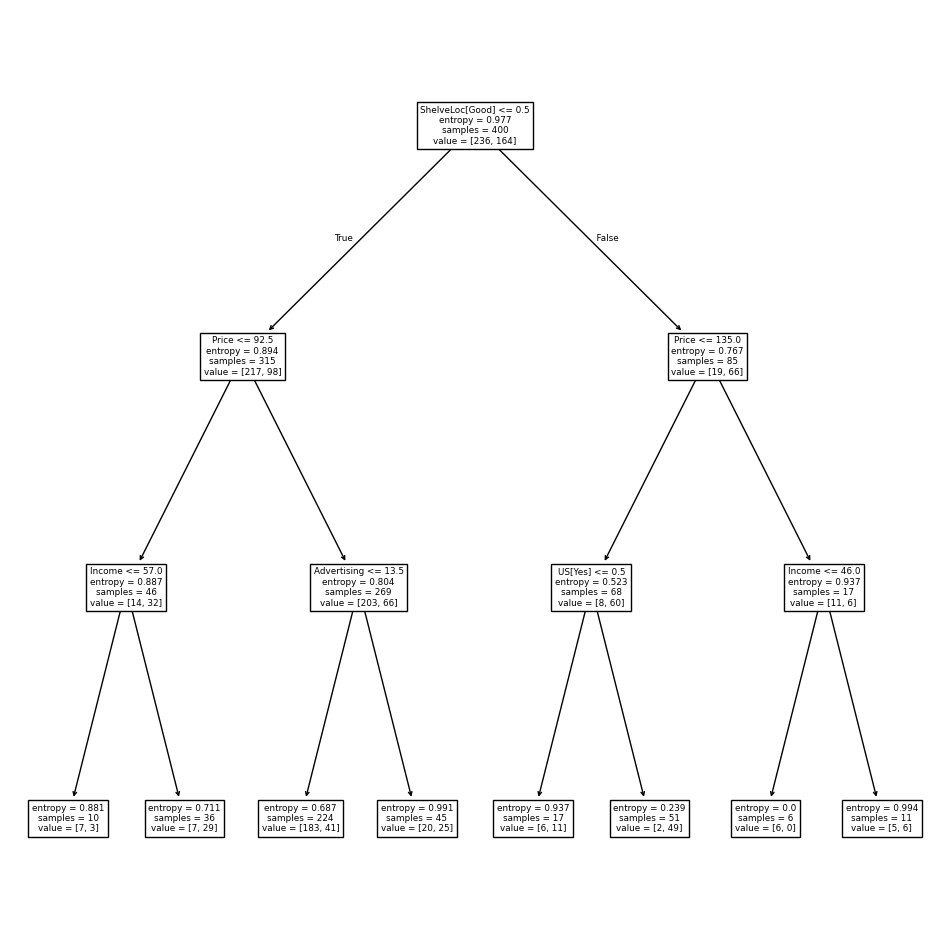

In [10]:
ax = subplots(figsize=(12,12))[1]
plot_tree(clf,
          feature_names=feature_names,
          ax=ax);

In [11]:
print(export_text(clf,
                  feature_names=feature_names,
                  show_weights=True))

|--- ShelveLoc[Good] <= 0.50
|   |--- Price <= 92.50
|   |   |--- Income <= 57.00
|   |   |   |--- weights: [7.00, 3.00] class: No
|   |   |--- Income >  57.00
|   |   |   |--- weights: [7.00, 29.00] class: Yes
|   |--- Price >  92.50
|   |   |--- Advertising <= 13.50
|   |   |   |--- weights: [183.00, 41.00] class: No
|   |   |--- Advertising >  13.50
|   |   |   |--- weights: [20.00, 25.00] class: Yes
|--- ShelveLoc[Good] >  0.50
|   |--- Price <= 135.00
|   |   |--- US[Yes] <= 0.50
|   |   |   |--- weights: [6.00, 11.00] class: Yes
|   |   |--- US[Yes] >  0.50
|   |   |   |--- weights: [2.00, 49.00] class: Yes
|   |--- Price >  135.00
|   |   |--- Income <= 46.00
|   |   |   |--- weights: [6.00, 0.00] class: No
|   |   |--- Income >  46.00
|   |   |   |--- weights: [5.00, 6.00] class: Yes



In [12]:
validation = skm.ShuffleSplit(n_splits=1,
                              test_size=200,
                              random_state=0)
results = skm.cross_validate(clf,
                             D,
                             High,
                             cv=validation)
results['test_score']

array([0.685])

In [13]:
(X_train,
X_test,
High_train,
High_test) = skm.train_test_split(X,
                High,
                test_size=0.5,
                random_state=0)

In [14]:
clf = DTC(criterion='entropy', random_state=0)
clf.fit(X_train, High_train)
accuracy_score(High_test, clf.predict(X_test))

0.735

In [15]:
ccp_path = clf.cost_complexity_pruning_path(X_train, High_train)
kfold = skm.KFold(10,
                  random_state=1,
                  shuffle=True)

In [16]:
grid = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')
grid.fit(X_train, High_train)
grid.best_score_

0.685

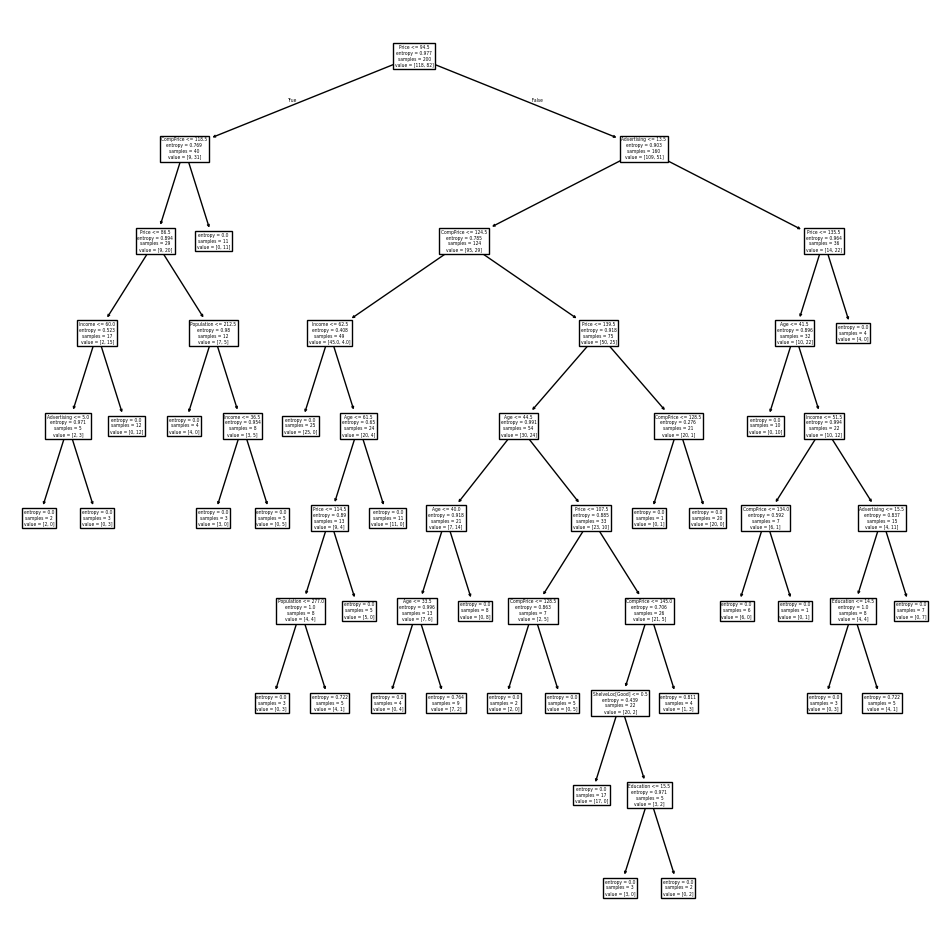

In [17]:
ax = subplots(figsize=(12, 12))[1]
best_ = grid.best_estimator_
plot_tree(best_,
          feature_names=feature_names,
          ax=ax);

In [18]:
best_.tree_.n_leaves

30

In [19]:
print(accuracy_score(High_test,
                     best_.predict(X_test)))
confusion = confusion_table(best_.predict(X_test),
                            High_test)
confusion

0.72


Truth,No,Yes
Predicted,,
No,94,32
Yes,24,50


#### Fitting Regression Trees

In [20]:
Boston = load_data("Boston")
model = MS(Boston.columns.drop('medv'), intercept=False)
D = model.fit_transform(Boston)
feature_names = list(D.columns)
X = np.asarray(D)

In [21]:
(X_train,
X_test,
y_train,
y_test) = skm.train_test_split(X,
                               Boston['medv'],
                               test_size=0.3,
                               random_state=0)

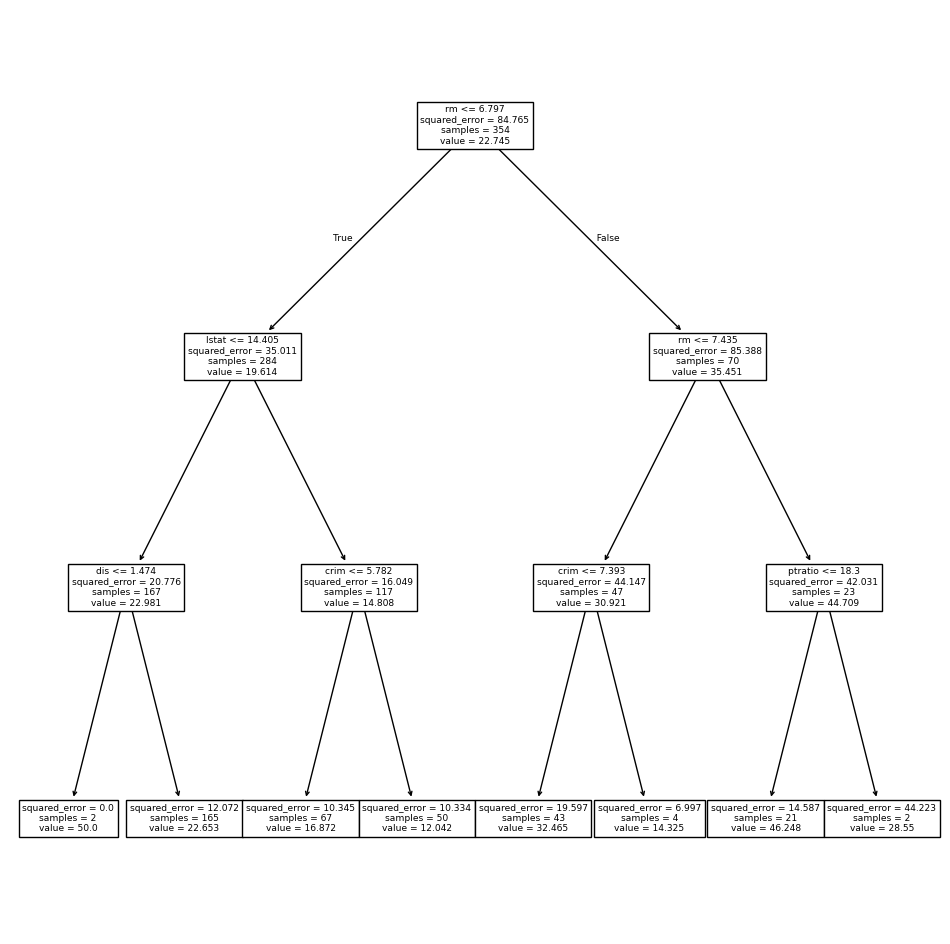

In [22]:
reg = DTR(max_depth=3)
reg.fit(X_train, y_train)
ax = subplots(figsize=(12,12))[1]
plot_tree(reg,
          feature_names=feature_names,
          ax=ax);

In [23]:
ccp_path = reg.cost_complexity_pruning_path(X_train, y_train)
kfold = skm.KFold(5,
                  shuffle=True,
                  random_state=10)
grid = skm.GridSearchCV(reg,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='neg_mean_squared_error')
G = grid.fit(X_train, y_train)

In [24]:
best_ = grid.best_estimator_
np.mean((y_test- best_.predict(X_test))**2)

28.069857549754044

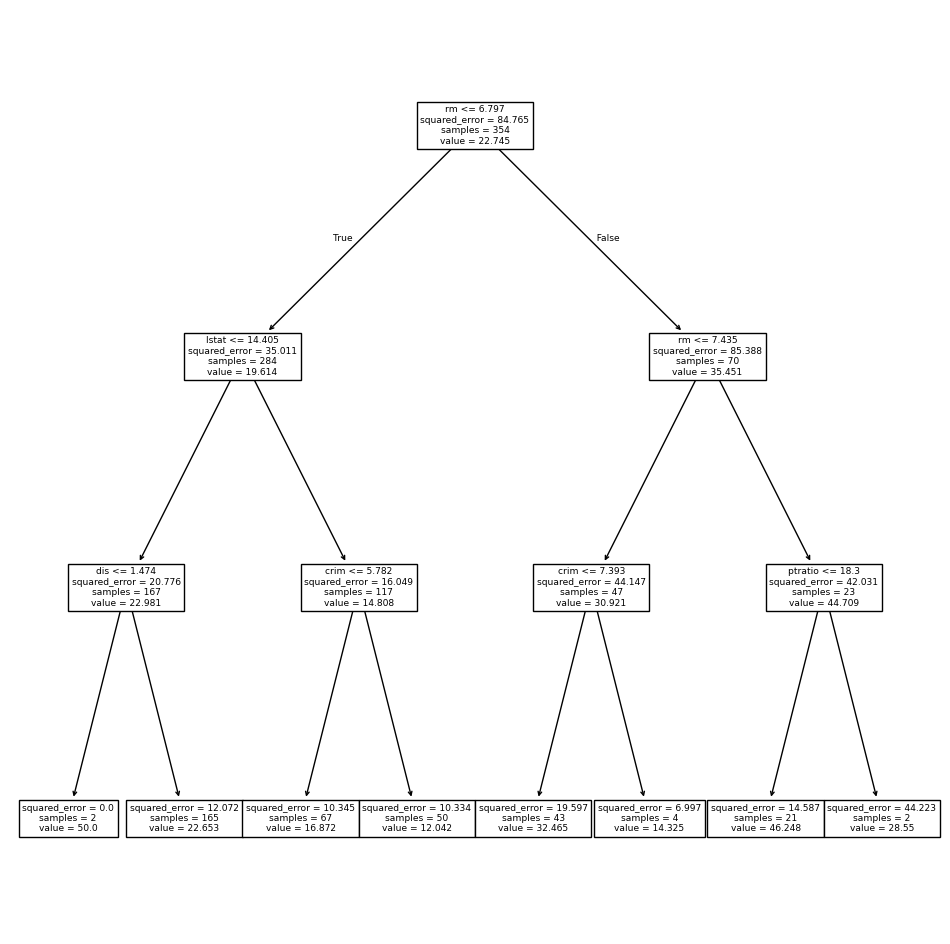

In [25]:
ax = subplots(figsize=(12,12))[1]
plot_tree(G.best_estimator_,
          feature_names=feature_names,
          ax=ax);

#### Bagging and Random Forests

In [26]:
bag_boston = RF(max_features=X_train.shape[1], random_state=0)
bag_boston.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""squared_error"", ""absolute_error"", ""friedman_mse"", ""poisson""}, default=""squared_error""The function to measure the quality of a split. Supported criteriaare ""squared_error"" for the mean squared error, which is equal tovariance reduction as feature selection criterion and minimizes the L2loss using the mean of each terminal node, ""friedman_mse"", which usesmean squared error with Friedman's improvement score for potentialsplits, ""absolute_error"" for the mean absolute error, which minimizesthe L1 loss using the median of each terminal node, and ""poisson"" whichuses reduction in Poisson deviance to find splits.Training using ""absolute_error"" is significantly slowerthan when using ""squared_error""... versionadded:: 0.18 Mean Absolute Error (MAE) criterion... versionadded:: 1.0 Poisson criterion.",'squared_error'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=1.0The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None or 1.0, then `max_features=n_features`... note:: The default of 1.0 is equivalent to bagged trees and more randomness can be achieved by setting smaller values, e.g. 0.3... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to 1.0.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",12
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples

14.634700151315787

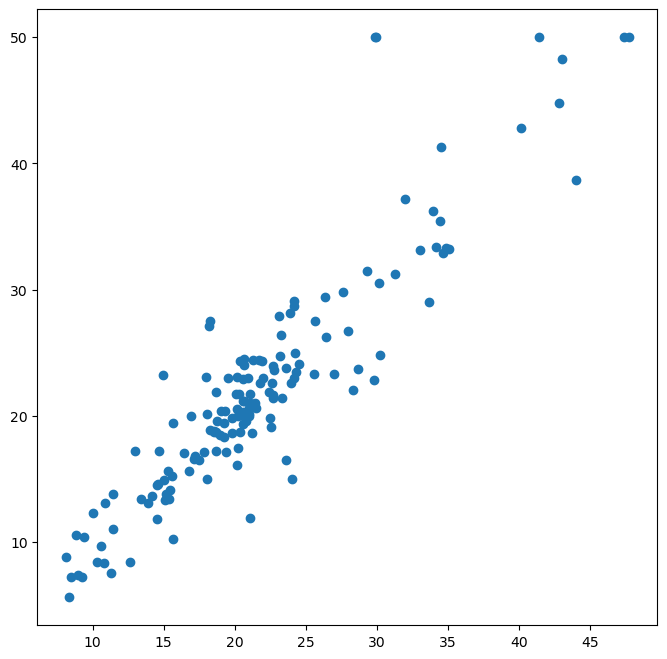

In [27]:
ax = subplots(figsize=(8,8))[1]
y_hat_bag = bag_boston.predict(X_test)
ax.scatter(y_hat_bag, y_test)
np.mean((y_test- y_hat_bag)**2)

In [28]:
bag_boston = RF(max_features=X_train.shape[1],
                n_estimators=500,
                random_state=0).fit(X_train, y_train)
y_hat_bag = bag_boston.predict(X_test)
np.mean((y_test- y_hat_bag)**2)

14.605662565263161

In [29]:
RF_boston = RF(max_features=6,
               random_state=0).fit(X_train, y_train)
y_hat_RF = RF_boston.predict(X_test)
np.mean((y_test- y_hat_RF)**2)

20.04276446710527

In [30]:
feature_imp = pd.DataFrame(
    {'importance':RF_boston.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False)

,importance
lstat,0.356203
rm,0.332163
ptratio,0.067270
crim,0.055404
indus,0.053851
dis,0.041582
nox,0.035225
tax,0.025355
age,0.021506
rad,0.004784


##### Boosting

In [31]:
boost_boston = GBR(n_estimators=5000,
                   learning_rate=0.001,
                   max_depth=3,
                   random_state=0)
boost_boston.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'huber', 'quantile'}, default='squared_error'Loss function to be optimized. 'squared_error' refers to the squarederror for regression. 'absolute_error' refers to the absolute error ofregression and is a robust loss function. 'huber' is acombination of the two. 'quantile' allows quantile regression (use`alpha` to specify the quantile).See:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_quantile.py`for an example that demonstrates quantile regression for creatingprediction intervals with `loss='quantile'`.",'squared_error'
,"learning_rate learning_rate: float, default=0.1Learning rate shrinks the contribution of each tree by `learning_rate`.There is a trade-off between learning_rate and n_estimators.Values must be in the range `[0.0, inf)`.",0.001
,"n_estimators n_estimators: int, default=100The number of boosting stages to perform. Gradient boostingis fairly robust to over-fitting so a large number usuallyresults in better performance.Values must be in the range `[1, inf)`.",5000
,"subsample subsample: float, default=1.0The fraction of samples to be used for fitting the individual baselearners. If smaller than 1.0 this results in Stochastic GradientBoosting. `subsample` interacts with the parameter `n_estimators`.Choosing `subsample < 1.0` leads to a reduction of varianceand an increase in bias.Values must be in the range `(0.0, 1.0]`.",1.0
,"criterion criterion: {'friedman_mse', 'squared_error'}, default='friedman_mse'The function to measure the quality of a split. Supported criteria are""friedman_mse"" for the mean squared error with improvement score byFriedman, ""squared_error"" for mean squared error. The default value of""friedman_mse"" is generally the best as it can provide a betterapproximation in some cases... versionadded:: 0.18",'friedman_mse'
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, values must be in the range `[2, inf)`.- If float, values must be in the range `(0.0, 1.0]` and `min_samples_split` will be `ceil(min_samples_split * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, values must be in the range `[1, inf)`.- If float, values must be in the range `(0.0, 1.0)` and `min_samples_leaf` will be `ceil(min_samples_leaf * n_samples)`... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.Values must be in the range `[0.0, 0.5]`.",0.0
,"max_depth max_depth: int or None, default=3Maximum depth of the individual regression estimators. The maximumdepth limits the number of nodes in the tree. Tune this parameterfor best performance; the best value depends on the interactionof the input variables. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.If int, values must be in the range `[1, inf)`.",3
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.Values must be in the range `[0.0, inf)`.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in thele

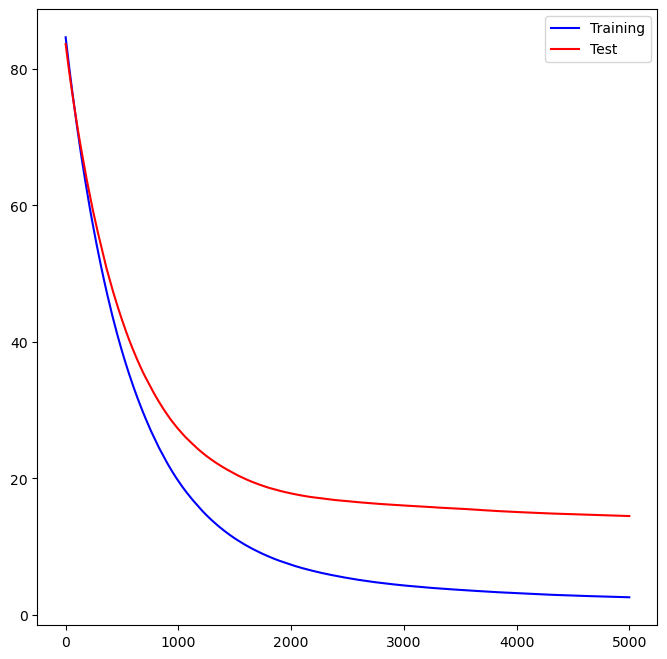

In [33]:
test_error = np.zeros_like(boost_boston.train_score_)
for idx, y_ in enumerate(boost_boston.staged_predict(X_test)):
    test_error[idx] = np.mean((y_test- y_)**2)

plot_idx = np.arange(boost_boston.train_score_.shape[0])
ax = subplots(figsize=(8,8))[1]
ax.plot(plot_idx,
        boost_boston.train_score_,
        'b',
        label='Training')
ax.plot(plot_idx,
        test_error,
        'r',
        label='Test')
ax.legend();

In [34]:
y_hat_boost = boost_boston.predict(X_test);
np.mean((y_test- y_hat_boost)**2)

14.481405918831591

In [35]:
boost_boston = GBR(n_estimators=5000,
                   learning_rate=0.2,
                   max_depth=3,
                   random_state=0)
boost_boston.fit(X_train,
                 y_train)
y_hat_boost = boost_boston.predict(X_test);
np.mean((y_test- y_hat_boost)**2)

14.501514553719565

##### Bayesian Additive Regression Trees

In [36]:
bart_boston = BART(random_state=0, burnin=5, ndraw=15)
bart_boston.fit(X_train, y_train)

,num_trees,200
,num_particles,10
,max_stages,5000
,split_prob,<function BAR...001C8E19F7380>
,min_depth,0
,std_scale,2
,split_prior,None
,ndraw,15
,burnin,5
,sigma_prior,"(5, ...)"
,num_quantile,50


In [37]:
yhat_test = bart_boston.predict(X_test.astype(np.float32))
np.mean((y_test- yhat_test)**2)

22.145009458109232

In [38]:
var_inclusion = pd.Series(bart_boston.variable_inclusion_.mean(0),
                                index=D.columns)
var_inclusion

crim       26.933333
zn         27.866667
indus      26.466667
chas       22.466667
nox        26.600000
rm         29.800000
age        22.733333
dis        26.466667
rad        23.666667
tax        24.133333
ptratio    24.266667
lstat      31.000000
dtype: float64

#### Exercises

$Conceptual$ 

1. Draw an example (of your own invention) of a partition of two dimensional feature space that could result from recursive binary splitting. Your example should contain at least six regions. Draw a decision tree corresponding to this partition. Be sure to label all aspects of your figures, including the regions $R_1, R_2, \ldots$, the cutpoints $t_1, t_2, \ldots$, and so forth.  
   **Hint:** Your result should look something like Figures 8.1 and 8.2.

In [40]:
from IPython.display import HTML, display

with open("recursive_binary_split.html", "r") as f:
    html_content = f.read()

display(HTML(html_content))

2. It is mentioned in Section 8.2.3 that boosting using depth-one trees (or stumps) leads to an additive model: that is, a model of the form 

   $$
   f(X) = \sum_{j=1}^{p} f_j(X_j).
   $$

   Explain why this is the case. You can begin with $ \hat{f}(x) = \sum_{b=1}^{B} \lambda \hat{f}^b(x)$ (8.12) in Algorithm 8.2.


##### Why Boosting with Stumps Yields an Additive Model

**Setup:** In Algorithm 8.2, the boosted model is:

$$\hat{f}(x) = \sum_{b=1}^{B} \lambda \hat{f}^b(x)$$

where each $\hat{f}^b$ is a tree fitted to the current residuals.



**Key Property of Depth-One Trees (Stumps):**

A stump splits on exactly **one feature** $X_j$ at a single threshold $t$, producing a prediction of the form:

$$\hat{f}^b(x) = c_1^b \cdot \mathbf{1}[X_j < t] + c_2^b \cdot \mathbf{1}[X_j \geq t] = g_j^b(X_j)$$

That is, each stump $\hat{f}^b$ is a **function of only one predictor** $X_j$ — it depends on no other variable.



**Summing Over All Boosting Iterations:**

$$\hat{f}(x) = \sum_{b=1}^{B} \lambda \hat{f}^b(x) = \sum_{b=1}^{B} \lambda\, g_{j(b)}^b\!\left(X_{j(b)}\right)$$

where $j(b)$ is the feature chosen by stump $b$. We can **group terms by feature index**:

$$\hat{f}(x) = \sum_{j=1}^{p} \underbrace{\left( \sum_{b:\, j(b)=j} \lambda\, g_j^b(X_j) \right)}_{f_j(X_j)}$$

Since each inner sum depends **only on $X_j$**, we can define:

$$f_j(X_j) = \sum_{b:\, j(b)=j} \lambda\, g_j^b(X_j)$$



**Conclusion:**

$$\boxed{\hat{f}(x) = \sum_{j=1}^{p} f_j(X_j)}$$

This is precisely an **additive model**: the overall prediction is a sum of univariate functions, one per predictor. The additivity arises because each stump contributes **only through a single feature**, so accumulating many stumps over $B$ iterations simply builds up a richer univariate function $f_j$ for each $X_j$, with no interaction terms between predictors ever introduced.


3. Consider the Gini index, classification error, and entropy in a simple classification setting with two classes. Create a single plot that displays each of these quantities as a function of $\hat{p}_{m1}$. The x-axis should display $\hat{p}_{m1}$, ranging from 0 to 1, and the y-axis should display the value of the Gini index, classification error, and entropy.  
   **Hint:** In a setting with two classes, $\hat{p}_{m1} + \hat{p}_{m2} = 1$. You could make this plot by hand, but it will be much easier to make in $R$.


C:\Users\Zoe Oladokun\AppData\Local\Temp\ipykernel_24716\1353378778.py:8: RuntimeWarning: divide by zero encountered in log2
  entropy = np.where((p == 0) | (p == 1), 0, -(p * np.log2(p) + (1-p) * np.log2(1-p)))
C:\Users\Zoe Oladokun\AppData\Local\Temp\ipykernel_24716\1353378778.py:8: RuntimeWarning: invalid value encountered in multiply
  entropy = np.where((p == 0) | (p == 1), 0, -(p * np.log2(p) + (1-p) * np.log2(1-p)))


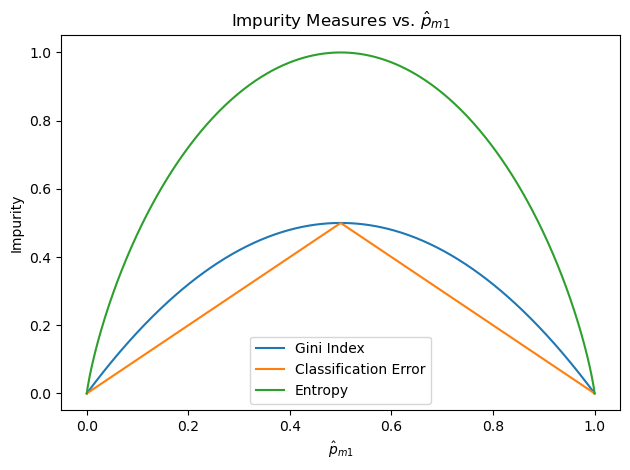

In [42]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0, 1, 500)

gini   = 2 * p * (1 - p)
error  = 1 - np.maximum(p, 1 - p)
entropy = np.where((p == 0) | (p == 1), 0, -(p * np.log2(p) + (1-p) * np.log2(1-p)))

plt.plot(p, gini,    label="Gini Index")
plt.plot(p, error,   label="Classification Error")
plt.plot(p, entropy, label="Entropy")

plt.xlabel(r"$\hat{p}_{m1}$")
plt.ylabel("Impurity")
plt.title("Impurity Measures vs. $\\hat{p}_{m1}$")
plt.legend()
plt.tight_layout()
plt.savefig("impurity.png", dpi=150)


4. This question relates to the plots in Figure 8.14.

FIGURE 8.14. Left: A partition of the predictor space corresponding to Exercise 4a. Right: A tree corresponding to Exercise 4b.

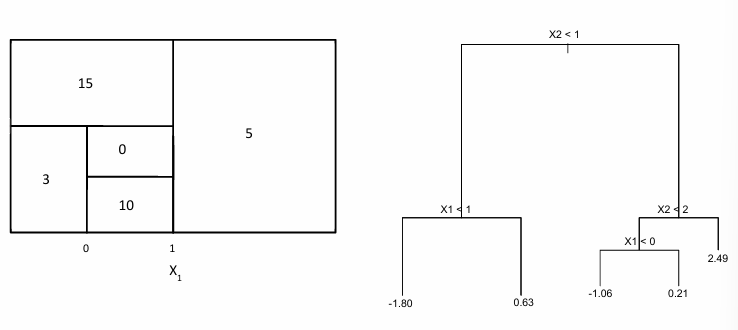


   (a) Sketch the tree corresponding to the partition of the predictor space illustrated in the left-hand panel of Figure 8.14. The numbers inside the boxes indicate the mean of $Y$ within each region.  
   (b) Create a diagram similar to the left-hand panel of Figure 8.14, using the tree illustrated in the right-hand panel of the same figure. You should divide up the predictor space into the correct regions, and indicate the mean for each region.

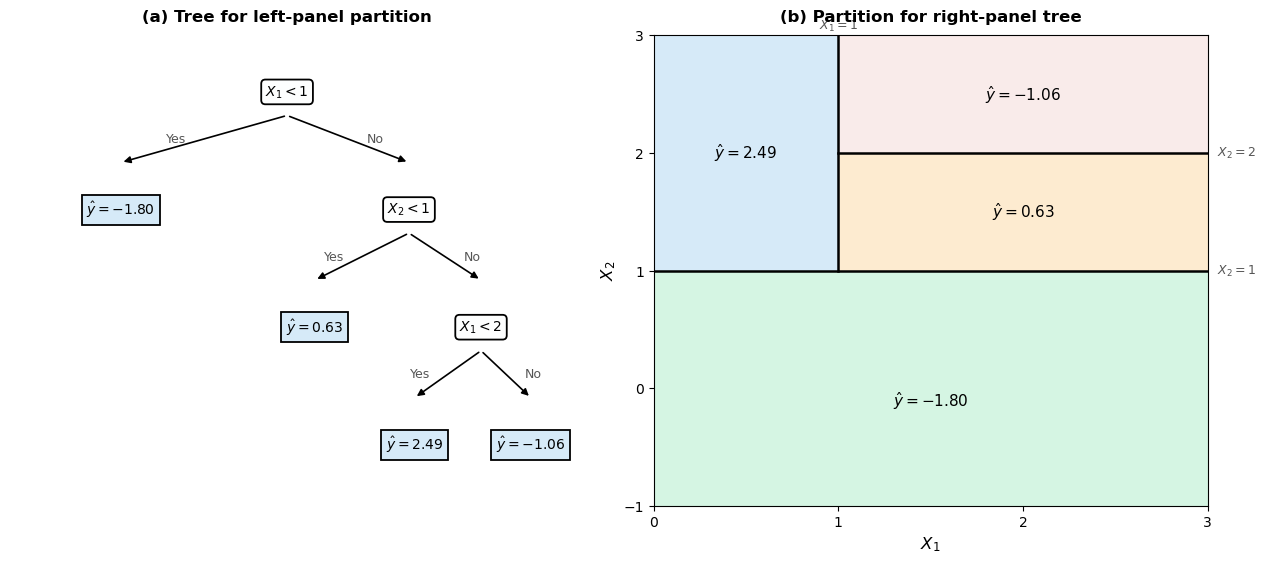

<Figure size 640x480 with 0 Axes>

In [48]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.patches import FancyArrowPatch

fig, axes = plt.subplots(1, 2, figsize=(13, 6))

# ─────────────────────────────────────────────
# (a) Tree corresponding to the LEFT partition
# ─────────────────────────────────────────────
# The left panel of Fig 8.14 shows:
#   X1 splits at 1:  left region (X1<1) and right (X1>=1)
#   On the right branch, X2 splits at 1: bottom (X2<1) and top (X2>=1)
#   The top-right is further split by X1 at 2: left (X1<2) and right (X1>=2)
#
# Regions and their means (reading Fig 8.14 left):
#   R1: X1 < 1                         → mean = -1.80
#   R2: X1 >= 1, X2 < 1                → mean =  0.63
#   R3: X1 in [1,2), X2 >= 1           → mean =  2.49
#   R4: X1 >= 2, X2 >= 1               → mean = -1.06

ax = axes[0]
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis("off")
ax.set_title("(a) Tree for left-panel partition", fontsize=12, fontweight="bold", pad=10)

def node(ax, x, y, text, boxstyle="round,pad=0.3", fc="white", fontsize=10):
    ax.text(x, y, text, ha="center", va="center", fontsize=fontsize,
            bbox=dict(boxstyle=boxstyle, fc=fc, ec="black", lw=1.3))

def leaf(ax, x, y, text):
    ax.text(x, y, text, ha="center", va="center", fontsize=10,
            bbox=dict(boxstyle="square,pad=0.35", fc="#D6EAF8", ec="black", lw=1.3))

def edge(ax, x1, y1, x2, y2, label="", side="left"):
    ax.annotate("", xy=(x2, y2+0.05), xytext=(x1, y1-0.05),
                arrowprops=dict(arrowstyle="-|>", color="black", lw=1.2))
    mx, my = (x1+x2)/2, (y1+y2)/2
    offset = -0.05 if side == "left" else 0.05
    ax.text(mx + offset, my, label, ha="center", va="center", fontsize=9, color="#555555")

# Root
node(ax, 0.50, 0.88, r"$X_1 < 1$", fc="#FDFEFE")
# Left child → leaf
edge(ax, 0.50, 0.88, 0.20, 0.68, "Yes", "left")
leaf(ax, 0.20, 0.63, r"$\hat{y} = -1.80$")

# Right child
edge(ax, 0.50, 0.88, 0.72, 0.68, "No", "right")
node(ax, 0.72, 0.63, r"$X_2 < 1$", fc="#FDFEFE")

# Right-left → leaf
edge(ax, 0.72, 0.63, 0.55, 0.43, "Yes", "left")
leaf(ax, 0.55, 0.38, r"$\hat{y} = 0.63$")

# Right-right
edge(ax, 0.72, 0.63, 0.85, 0.43, "No", "right")
node(ax, 0.85, 0.38, r"$X_1 < 2$", fc="#FDFEFE")

# Right-right-left → leaf
edge(ax, 0.85, 0.38, 0.73, 0.18, "Yes", "left")
leaf(ax, 0.73, 0.13, r"$\hat{y} = 2.49$")

# Right-right-right → leaf
edge(ax, 0.85, 0.38, 0.94, 0.18, "No", "right")
leaf(ax, 0.94, 0.13, r"$\hat{y} = -1.06$")

# ─────────────────────────────────────────────
# (b) Partition from the RIGHT-panel tree
# ─────────────────────────────────────────────
# The right panel tree of Fig 8.14:
#   Root:        X2 < 1    → left(Yes): leaf -1.80;  right(No): X1 < 1
#                X1 < 1    → left(Yes): leaf  2.49;  right(No): X2 < 0
#                X2 < 0    → left(Yes): leaf  0.63;  right(No): leaf -1.06
#
# This produces 4 regions in (X1, X2) space (using ranges that fill a 0–3 × -1–2 box):
#   R1: X2 < 1                     (bottom strip)          → -1.80
#   R2: X2 >= 1, X1 < 1            (top-left)              →  2.49
#   R3: X2 in [0,1), … wait — re-read tree carefully:
#
# Correct reading of right-panel tree:
#   Split 1 (root): X2 < 1
#       YES → -1.80
#       NO  → Split 2: X1 < 1
#                 YES → 2.49
#                 NO  → Split 3: X2 < 0  [but X2<1 already said no, so X2>=1; X2<0 impossible]
#
# Re-reading: the right-panel tree must be:
#   Root: X2 < 1   YES→ leaf(-1.80),  NO → X1<1
#                           YES→ leaf(2.49), NO → X2<2
#                                                 YES→ leaf(0.63), NO→ leaf(-1.06)
#
# Regions (X1 in [0,3], X2 in [-1,3]):
#   R1: X2 < 1                         → -1.80
#   R2: X2 >= 1,  X1 < 1               →  2.49
#   R3: X2 in [1,2), X1 >= 1           →  0.63
#   R4: X2 >= 2,  X1 >= 1              → -1.06

ax2 = axes[1]
ax2.set_xlim(0, 3)
ax2.set_ylim(-1, 3)
ax2.set_xlabel("$X_1$", fontsize=12)
ax2.set_ylabel("$X_2$", fontsize=12)
ax2.set_title("(b) Partition for right-panel tree", fontsize=12, fontweight="bold", pad=10)

colors = ["#D5F5E3", "#D6EAF8", "#FDEBD0", "#F9EBEA"]

from matplotlib.patches import Rectangle

# R1: X2 < 1, all X1
ax2.add_patch(Rectangle((0, -1), 3, 2, fc=colors[0], ec="none"))
# R2: X2 >= 1, X1 < 1
ax2.add_patch(Rectangle((0,  1), 1, 2, fc=colors[1], ec="none"))
# R3: X2 in [1,2), X1 >= 1
ax2.add_patch(Rectangle((1,  1), 2, 1, fc=colors[2], ec="none"))
# R4: X2 >= 2, X1 >= 1
ax2.add_patch(Rectangle((1,  2), 2, 1, fc=colors[3], ec="none"))

# Draw partition lines
ax2.axhline(1,  color="black", lw=1.8)           # X2 = 1 (full width)
ax2.axhline(2,  xmin=1/3, color="black", lw=1.8) # X2 = 2 (X1 >= 1 only)
ax2.axvline(1,  ymin=2/4, color="black", lw=1.8) # X1 = 1 (X2 >= 1 only)

# Region labels
ax2.text(1.50, -0.10, r"$\hat{y} = -1.80$", ha="center", va="center", fontsize=11, fontweight="bold")
ax2.text(0.50,  2.00, r"$\hat{y} = 2.49$",  ha="center", va="center", fontsize=11, fontweight="bold")
ax2.text(2.00,  1.50, r"$\hat{y} = 0.63$",  ha="center", va="center", fontsize=11, fontweight="bold")
ax2.text(2.00,  2.50, r"$\hat{y} = -1.06$", ha="center", va="center", fontsize=11, fontweight="bold")

# Region boundary annotations
ax2.text(3.05,  1.0, r"$X_2=1$",  va="center", fontsize=9, color="#555")
ax2.text(3.05,  2.0, r"$X_2=2$",  va="center", fontsize=9, color="#555")
ax2.text(1.0,  3.05, r"$X_1=1$",  ha="center", fontsize=9, color="#555")

ax2.set_xticks([0, 1, 2, 3])
ax2.set_yticks([-1, 0, 1, 2, 3])
ax2.tick_params(labelsize=10)

plt.tight_layout(pad=2.0);
plt.show();
plt.savefig("fig8_14_ab.png", dpi=150, bbox_inches="tight")

5. Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce 10 estimates of $P(\text{Class is Red} | X)$: 

$$0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and, 0.75. $$

There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?


**Majority Vote**

Each estimate is thresholded at 0.5 to get a class vote:

| Estimate | Vote |
|---|---|
| 0.10, 0.15, 0.20, 0.20 | Green (4 votes) |
| 0.55, 0.60, 0.60, 0.65, 0.70, 0.75 | Red (6 votes) |

6 out of 10 trees vote **Red** → final classification: **Red**

---

**Average Probability**

$$\bar{p} = \frac{0.1 + 0.15 + 0.2 + 0.2 + 0.55 + 0.6 + 0.6 + 0.65 + 0.7 + 0.75}{10} = \frac{4.5}{10} = 0.45$$

Since $\bar{p} = 0.45 < 0.5$ → final classification: **Green**

---

**Summary**

The two approaches disagree here because the probability estimates are skewed — 4 estimates are clustered well below 0.5 (around 0.1–0.2), while 6 are spread above 0.5 (0.55–0.75). The majority vote only counts *which side of 0.5* each estimate falls on, so the six Red votes win. The average probability method, however, is dragged down by the four estimates that are far below 0.5, pulling the mean under the 0.5 threshold and flipping the result to Green. This illustrates that the two methods are **not equivalent** and can yield different predictions.


6. Provide a detailed explanation of the algorithm that is used to fit a regression tree.


## Fitting a Regression Tree: Recursive Binary Splitting

The goal is to partition the predictor space $\mathcal{X} \subset \mathbb{R}^p$ into $J$ non-overlapping rectangular regions $R_1, R_2, \ldots, R_J$, and predict the response in each region as the mean of training observations that fall there.

---

### Step 1: Define the Prediction and Loss

For any region $R_j$, the prediction is:
$$\hat{y}_{R_j} = \text{ave}(y_i \mid x_i \in R_j)$$

The overall training loss we wish to minimize is the **residual sum of squares (RSS)**:
$$\text{RSS} = \sum_{j=1}^{J} \sum_{i:\, x_i \in R_j} (y_i - \hat{y}_{R_j})^2$$

Finding the globally optimal partition is computationally infeasible (there are exponentially many possible rectangular partitions), so we use a greedy procedure instead.

---

### Step 2: Recursive Binary Splitting (Greedy)

At each step, consider splitting one existing region by choosing a **predictor** $X_j$ and a **cutpoint** $s$ to divide the data into two half-planes:

$$R_1(j, s) = \{X \mid X_j < s\} \qquad \text{and} \qquad R_2(j, s) = \{X \mid X_j \geq s\}$$

We select the pair $(j, s)$ that minimizes:

$$\sum_{i:\, x_i \in R_1(j,s)} (y_i - \hat{y}_{R_1})^2 + \sum_{i:\, x_i \in R_2(j,s)} (y_i - \hat{y}_{R_2})^2$$

This search is tractable: for each predictor $X_j$, the candidate cutpoints $s$ are just the unique observed values of $X_j$, so the entire search over all $(j, s)$ pairs is $O(np)$ per split.

The process is then **repeated recursively** on each resulting region — never revisiting a previous split — until a stopping criterion is met (e.g. no region contains more than a minimum number of observations).

---

### Step 3: Pruning via Cost-Complexity (Weakest Link Pruning)

The fully grown tree $T_0$ typically overfits. Rather than stopping the splitting early, we grow a large tree and then **prune** it back. For a subtree $T \subset T_0$, define the **cost-complexity criterion**:

$$C_\alpha(T) = \sum_{m=1}^{|T|} \sum_{i:\, x_i \in R_m} (y_i - \hat{y}_{R_m})^2 + \alpha |T|$$

where $|T|$ is the number of terminal nodes (leaves) and $\alpha \geq 0$ is a tuning parameter penalising complexity.

For each value of $\alpha$, there exists a unique smallest subtree $T_\alpha$ that minimises $C_\alpha(T)$. As $\alpha$ increases, branches are progressively collapsed, producing a nested sequence of subtrees. The **weakest link** at each step is the internal node whose removal increases RSS per unit reduction in leaves the least.

---

### Step 4: Select $\alpha$ via Cross-Validation

Use $K$-fold cross-validation to estimate the test MSE as a function of $\alpha$:

1. For each fold, grow a full tree on the training portion and prune it across a grid of $\alpha$ values.
2. Evaluate MSE on the held-out fold.
3. Average across folds and select $\hat{\alpha}$ that minimises the cross-validated MSE.
4. Return $T_{\hat{\alpha}}$ — the subtree of the full training tree corresponding to $\hat{\alpha}$.

---

### Summary of the Full Algorithm

$$\underbrace{\text{Grow large tree } T_0}_{\text{recursive binary splitting}} \xrightarrow{\text{cost-complexity pruning}} \underbrace{\{T_\alpha\}}_{\text{nested subtrees}} \xrightarrow{K\text{-fold CV}} \underbrace{T_{\hat\alpha}}_{\text{final tree}}$$

The result is a piecewise-constant function over a rectangular partition of the predictor space, chosen to balance training fit against model complexity.

$Applied$

7. In Section 8.3.3, we applied random forests to the `Boston` data using `max_features = 6` and using `n_estimators = 100` and `n_estimators = 500`. Create a plot displaying the test error resulting from random forests on this data set for a more comprehensive range of values for `max_features` and `n_estimators`. You can model your plot after Figure 8.10. Describe the results obtained.

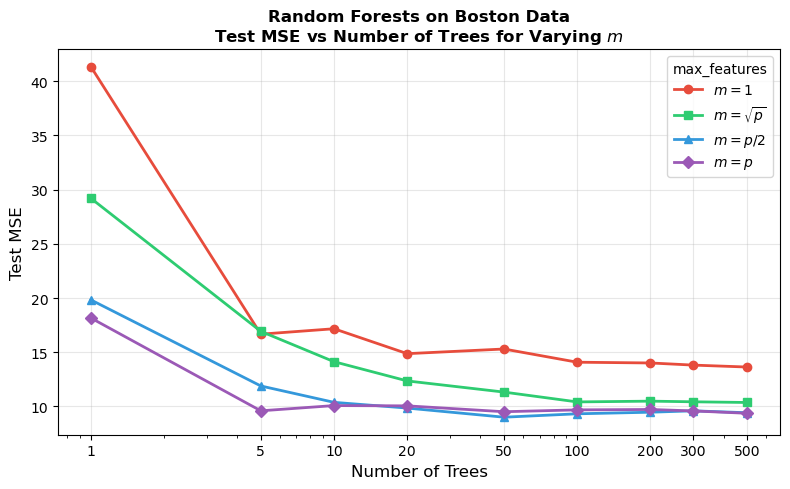

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from ISLP import load_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# ── Load data ─────────────────────────────────────────────────────────────────
Boston = load_data('Boston')
X = Boston.drop(columns='medv')
y = Boston['medv']
p = X.shape[1]   # 12 predictors

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# ── Grid ──────────────────────────────────────────────────────────────────────
n_estimators_grid = [1, 5, 10, 20, 50, 100, 200, 300, 500]
max_features_grid = {
    r'$m = 1$':         1,
    r'$m = \sqrt{p}$':  int(np.sqrt(p)),   # ≈ 3
    r'$m = p/2$':       p // 2,            # = 6
    r'$m = p$':         p,                 # = 12  (bagging)
}

# ── Compute test MSE ──────────────────────────────────────────────────────────
results = {}
for label, mf in max_features_grid.items():
    mses = []
    for n in n_estimators_grid:
        rf = RandomForestRegressor(
            n_estimators=n, max_features=mf,
            random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        mses.append(np.mean((rf.predict(X_test) - y_test) ** 2))
    results[label] = mses

# ── Plot ──────────────────────────────────────────────────────────────────────
colors    = ['#E74C3C', '#2ECC71', '#3498DB', '#9B59B6']
styles    = ['-o', '-s', '-^', '-D']

fig, ax = plt.subplots(figsize=(8, 5))

for (label, mses), col, sty in zip(results.items(), colors, styles):
    ax.plot(n_estimators_grid, mses, sty, color=col, lw=2,
            markersize=6, label=label)

ax.set_xlabel("Number of Trees", fontsize=12)
ax.set_ylabel("Test MSE", fontsize=12)
ax.set_title("Random Forests on Boston Data\n"
             "Test MSE vs Number of Trees for Varying $m$",
             fontsize=12, fontweight='bold')
ax.legend(title="max_features", fontsize=10, title_fontsize=10)
ax.set_xscale('log')
ax.set_xticks(n_estimators_grid)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('boston_rf_test_mse.png', dpi=150, bbox_inches='tight')
plt.show()

8. In the lab, a classification tree was applied to the `Carseats` data set after converting `Sales` into a qualitative response variable. Now we will seek to predict `Sales` using regression trees and related approaches, treating the response as a quantitative variable.
   
   (a) Split the data set into a training set and a test set.  
   (b) Fit a regression tree to the training set. Plot the tree, and interpret the results. What test MSE do you obtain?  
   (c) Use cross-validation in order to determine the optimal level of tree complexity. Does pruning the tree improve the test MSE?  
   (d) Use the bagging approach in order to analyze this data. What test MSE do you obtain? Use the `feature_importance_` values to determine which variables are most important.  
   (e) Use random forests to analyze this data. What test MSE do you obtain? Use the `feature_importance_` values to determine which variables are most important. Describe the effect of $m$, the number of variables considered at each split, on the error rate obtained.  
   (f) Now analyze the data using BART, and report your results.  


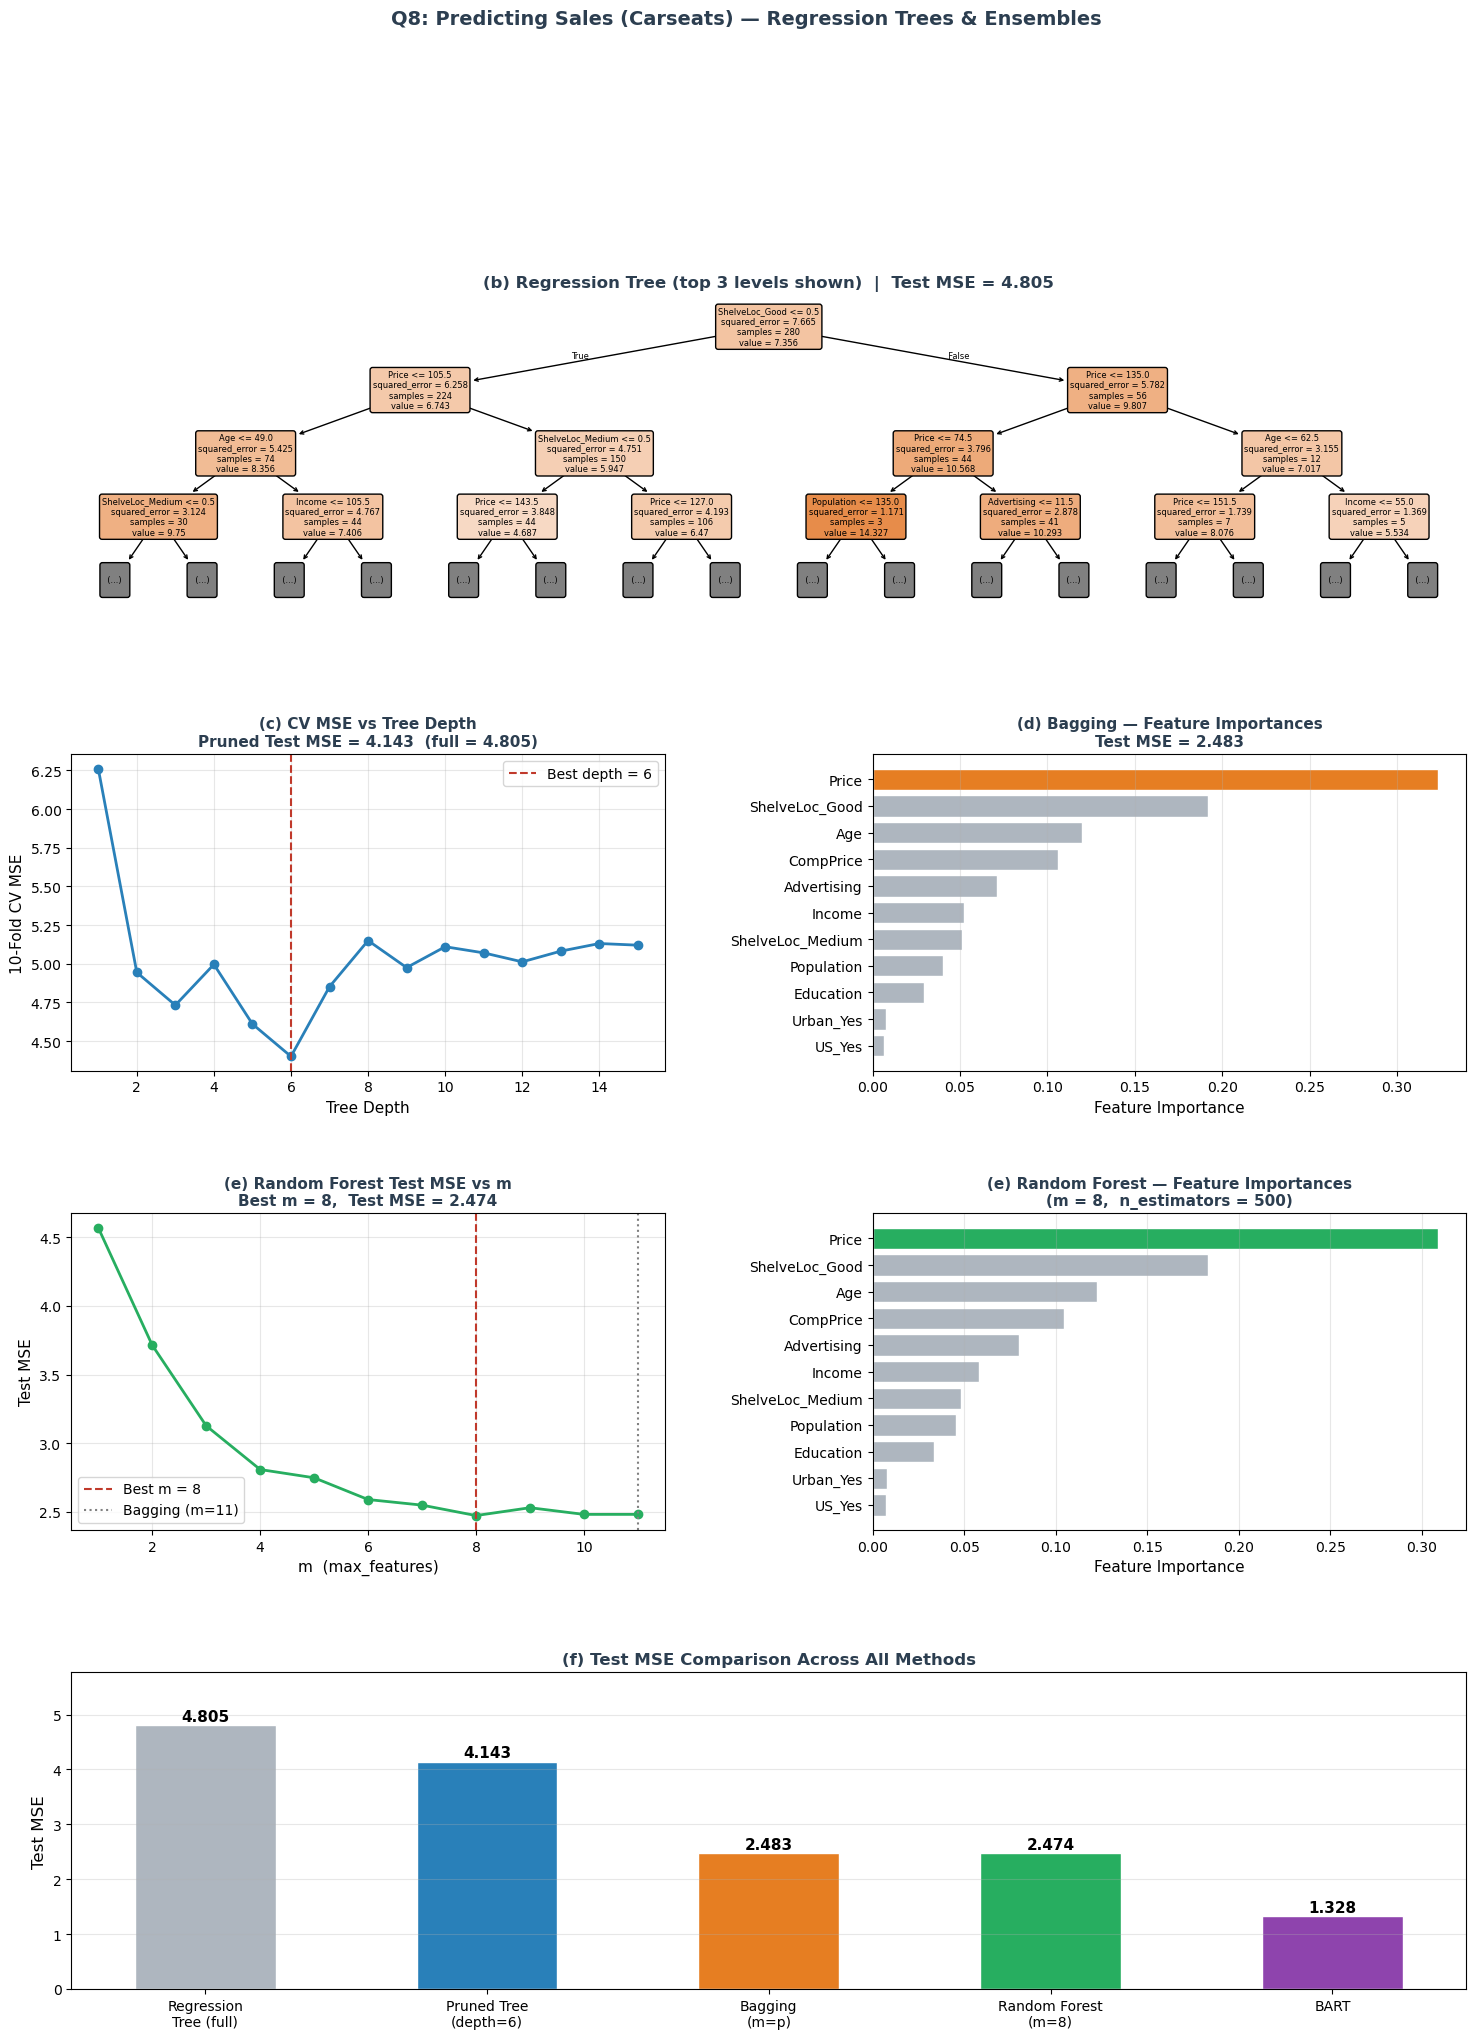

TEST MSE SUMMARY
  Regression Tree (full)               4.8053
  Pruned Tree (depth=6)                4.1425
  Bagging (m=p)                        2.4830
  Random Forest (m=8)                  2.4744
  BART                                 1.3277

Top 3 variables (Bagging):      Price, ShelveLoc_Good, Age
Top 3 variables (Random Forest): Price, ShelveLoc_Good, Age
Best RF m: 8 out of p=11


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator

from ISLP import load_data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error

# BART
from ISLP.bart import BART

np.random.seed(42)

# ── Load & prepare data ───────────────────────────────────────────────────────
Carseats = load_data('Carseats')

# One-hot encode categorical variables (ShelveLoc, Urban, US)
Carseats_enc = pd.get_dummies(Carseats, drop_first=True)

X = Carseats_enc.drop(columns='Sales')
y = Carseats_enc['Sales']
feature_names = X.columns.tolist()
p = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

# ─────────────────────────────────────────────────────────────────────────────
# (b) Fit a regression tree to the training set
# ─────────────────────────────────────────────────────────────────────────────
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)
mse_tree = mean_squared_error(y_test, tree.predict(X_test))

# ─────────────────────────────────────────────────────────────────────────────
# (c) Cross-validation to find optimal tree depth / complexity
# ─────────────────────────────────────────────────────────────────────────────
max_depths = range(1, 16)
cv_mses = []
for d in max_depths:
    t = DecisionTreeRegressor(max_depth=d, random_state=42)
    scores = cross_val_score(t, X_train, y_train,
                             cv=10, scoring='neg_mean_squared_error')
    cv_mses.append(-scores.mean())

best_depth = list(max_depths)[np.argmin(cv_mses)]
pruned_tree = DecisionTreeRegressor(max_depth=best_depth, random_state=42)
pruned_tree.fit(X_train, y_train)
mse_pruned = mean_squared_error(y_test, pruned_tree.predict(X_test))

# ─────────────────────────────────────────────────────────────────────────────
# (d) Bagging
# ─────────────────────────────────────────────────────────────────────────────
bag = RandomForestRegressor(n_estimators=500, max_features=p,
                             random_state=42, n_jobs=-1)
bag.fit(X_train, y_train)
mse_bag = mean_squared_error(y_test, bag.predict(X_test))
bag_importance = pd.Series(bag.feature_importances_, index=feature_names).sort_values(ascending=True)

# ─────────────────────────────────────────────────────────────────────────────
# (e) Random Forests — vary m
# ─────────────────────────────────────────────────────────────────────────────
m_values = list(range(1, p + 1))
rf_mses  = []
for m in m_values:
    rf = RandomForestRegressor(n_estimators=500, max_features=m,
                                random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    rf_mses.append(mean_squared_error(y_test, rf.predict(X_test)))

best_m   = m_values[np.argmin(rf_mses)]
best_rf  = RandomForestRegressor(n_estimators=500, max_features=best_m,
                                  random_state=42, n_jobs=-1)
best_rf.fit(X_train, y_train)
mse_rf   = min(rf_mses)
rf_importance = pd.Series(best_rf.feature_importances_,
                           index=feature_names).sort_values(ascending=True)

# ─────────────────────────────────────────────────────────────────────────────
# (f) BART
# ─────────────────────────────────────────────────────────────────────────────
bart = BART(random_state=42)
bart.fit(X_train.values.astype(float), y_train.values.astype(float))
mse_bart = mean_squared_error(y_test, bart.predict(X_test.values.astype(float)))

# ─────────────────────────────────────────────────────────────────────────────
# ── PLOTTING ──────────────────────────────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────────────
fig = plt.figure(figsize=(18, 22))
gs  = gridspec.GridSpec(4, 2, figure=fig, hspace=0.45, wspace=0.35)

GRAY   = '#2C3E50'
BLUE   = '#2980B9'
GREEN  = '#27AE60'
ORANGE = '#E67E22'
RED    = '#C0392B'
PURPLE = '#8E44AD'

# ── (b) Regression Tree ───────────────────────────────────────────────────────
ax_tree = fig.add_subplot(gs[0, :])
plot_tree(tree, feature_names=feature_names, filled=True,
          rounded=True, fontsize=6, ax=ax_tree,
          max_depth=3)          # show top 3 levels for readability
ax_tree.set_title(
    f'(b) Regression Tree (top 3 levels shown)  |  Test MSE = {mse_tree:.3f}',
    fontsize=12, fontweight='bold', color=GRAY)

# ── (c) CV MSE vs depth ───────────────────────────────────────────────────────
ax_cv = fig.add_subplot(gs[1, 0])
ax_cv.plot(list(max_depths), cv_mses, '-o', color=BLUE, lw=2, markersize=6)
ax_cv.axvline(best_depth, color=RED, ls='--', lw=1.5,
              label=f'Best depth = {best_depth}')
ax_cv.set_xlabel('Tree Depth', fontsize=11)
ax_cv.set_ylabel('10-Fold CV MSE', fontsize=11)
ax_cv.set_title(
    f'(c) CV MSE vs Tree Depth\nPruned Test MSE = {mse_pruned:.3f}  '
    f'(full = {mse_tree:.3f})',
    fontsize=11, fontweight='bold', color=GRAY)
ax_cv.legend(fontsize=10)
ax_cv.xaxis.set_major_locator(MaxNLocator(integer=True))
ax_cv.grid(alpha=0.3)

# ── (d) Bagging feature importance ───────────────────────────────────────────
ax_bag = fig.add_subplot(gs[1, 1])
colors_bag = [ORANGE if v == bag_importance.max() else '#AEB6BF'
              for v in bag_importance.values]
ax_bag.barh(bag_importance.index, bag_importance.values,
            color=colors_bag, edgecolor='white')
ax_bag.set_xlabel('Feature Importance', fontsize=11)
ax_bag.set_title(
    f'(d) Bagging — Feature Importances\nTest MSE = {mse_bag:.3f}',
    fontsize=11, fontweight='bold', color=GRAY)
ax_bag.grid(axis='x', alpha=0.3)

# ── (e) RF MSE vs m ───────────────────────────────────────────────────────────
ax_rfm = fig.add_subplot(gs[2, 0])
ax_rfm.plot(m_values, rf_mses, '-o', color=GREEN, lw=2, markersize=6)
ax_rfm.axvline(best_m, color=RED, ls='--', lw=1.5,
               label=f'Best m = {best_m}')
ax_rfm.axvline(p, color='gray', ls=':', lw=1.5, label=f'Bagging (m={p})')
ax_rfm.set_xlabel('m  (max_features)', fontsize=11)
ax_rfm.set_ylabel('Test MSE', fontsize=11)
ax_rfm.set_title(
    f'(e) Random Forest Test MSE vs m\nBest m = {best_m},  Test MSE = {mse_rf:.3f}',
    fontsize=11, fontweight='bold', color=GRAY)
ax_rfm.legend(fontsize=10)
ax_rfm.grid(alpha=0.3)

# ── (e) RF feature importance ────────────────────────────────────────────────
ax_rfi = fig.add_subplot(gs[2, 1])
colors_rf = [GREEN if v == rf_importance.max() else '#AEB6BF'
             for v in rf_importance.values]
ax_rfi.barh(rf_importance.index, rf_importance.values,
            color=colors_rf, edgecolor='white')
ax_rfi.set_xlabel('Feature Importance', fontsize=11)
ax_rfi.set_title(
    f'(e) Random Forest — Feature Importances\n(m = {best_m},  n_estimators = 500)',
    fontsize=11, fontweight='bold', color=GRAY)
ax_rfi.grid(axis='x', alpha=0.3)

# ── (f) Summary bar chart of all test MSEs ───────────────────────────────────
ax_sum = fig.add_subplot(gs[3, :])
methods = ['Regression\nTree (full)', f'Pruned Tree\n(depth={best_depth})',
           'Bagging\n(m=p)', f'Random Forest\n(m={best_m})', 'BART']
mses    = [mse_tree, mse_pruned, mse_bag, mse_rf, mse_bart]
bar_colors = ['#AEB6BF', BLUE, ORANGE, GREEN, PURPLE]

bars = ax_sum.bar(methods, mses, color=bar_colors, edgecolor='white', width=0.5)
for bar, val in zip(bars, mses):
    ax_sum.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                f'{val:.3f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax_sum.set_ylabel('Test MSE', fontsize=12)
ax_sum.set_title('(f) Test MSE Comparison Across All Methods',
                 fontsize=12, fontweight='bold', color=GRAY)
ax_sum.set_ylim(0, max(mses) * 1.2)
ax_sum.grid(axis='y', alpha=0.3)

plt.suptitle('Q8: Predicting Sales (Carseats) — Regression Trees & Ensembles',
             fontsize=14, fontweight='bold', y=1.01, color=GRAY)

plt.savefig('carseats_regression_trees.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()

# ── Print summary ─────────────────────────────────────────────────────────────
print("=" * 50)
print("TEST MSE SUMMARY")
print("=" * 50)
for name, mse in zip(methods, mses):
    print(f"  {name.replace(chr(10),' '):35s}  {mse:.4f}")
print(f"\nTop 3 variables (Bagging):      {', '.join(bag_importance.iloc[-3:].index[::-1].tolist())}")
print(f"Top 3 variables (Random Forest): {', '.join(rf_importance.iloc[-3:].index[::-1].tolist())}")
print(f"Best RF m: {best_m} out of p={p}")


9. This problem involves the `OJ` data set which is part of the `ISLP` package.  
   (a) Create a training set containing a random sample of 800 observations, and a test set containing the remaining observations.  
   (b) Fit a tree to the training data, with `Purchase` as the response and the other variables as predictors. What is the training error rate?  
   (c) Create a plot of the tree, and interpret the results. How many terminal nodes does the tree have?  
   (d) Use the `export_tree()` function to produce a text summary of the fitted tree. Pick one of the terminal nodes, and interpret the information displayed.  
   (e) Predict the response on the test data, and produce a confusion matrix comparing the test labels to the predicted test labels. What is the test error rate?  
   (f) Use cross-validation on the training set in order to determine the optimal tree size.  
   (g) Produce a plot with tree size on the x-axis and cross-validated classification error rate on the y-axis.  
   (h) Which tree size corresponds to the lowest cross-validated classification error rate?  
   (i) Produce a pruned tree corresponding to the optimal tree size obtained using cross-validation. If cross-validation does not lead to selection of a pruned tree, then create a pruned tree with five terminal nodes.  
   (j) Compare the training error rates between the pruned and unpruned trees. Which is higher?  
   (k) Compare the test error rates between the pruned and unpruned trees. Which is higher?

Training set : 800 observations
Test set     : 270 observations

(b) Training error rate : 0.0125  (1.25%)
    Terminal nodes       : 174

(d) Text summary (top 3 levels):

|--- LoyalCH <= 0.50
|   |--- LoyalCH <= 0.28
|   |   |--- STORE <= 1.50
|   |   |   |--- ListPriceDiff <= 0.13
|   |   |   |   |--- class: CH
|   |   |   |--- ListPriceDiff >  0.13
|   |   |   |   |--- truncated branch of depth 6
|   |   |--- STORE >  1.50
|   |   |   |--- WeekofPurchase <= 267.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- WeekofPurchase >  267.50
|   |   |   |   |--- truncated branch of depth 4
|   |--- LoyalCH >  0.28
|   |   |--- PriceDiff <= 0.05
|   |   |   |--- SpecialCH <= 0.50
|   |   |   |   |--- truncated branch of depth 11
|   |   |   |--- SpecialCH >  0.50
|   |   |   |   |--- truncated branch of depth 9
|   |   |--- PriceDiff >  0.05
|   |   |   |--- StoreID <= 3.50
|   |   |   |   |--- truncated branch of depth 17
|   |   |   |--- StoreID >  3.50
|   |   |   |  

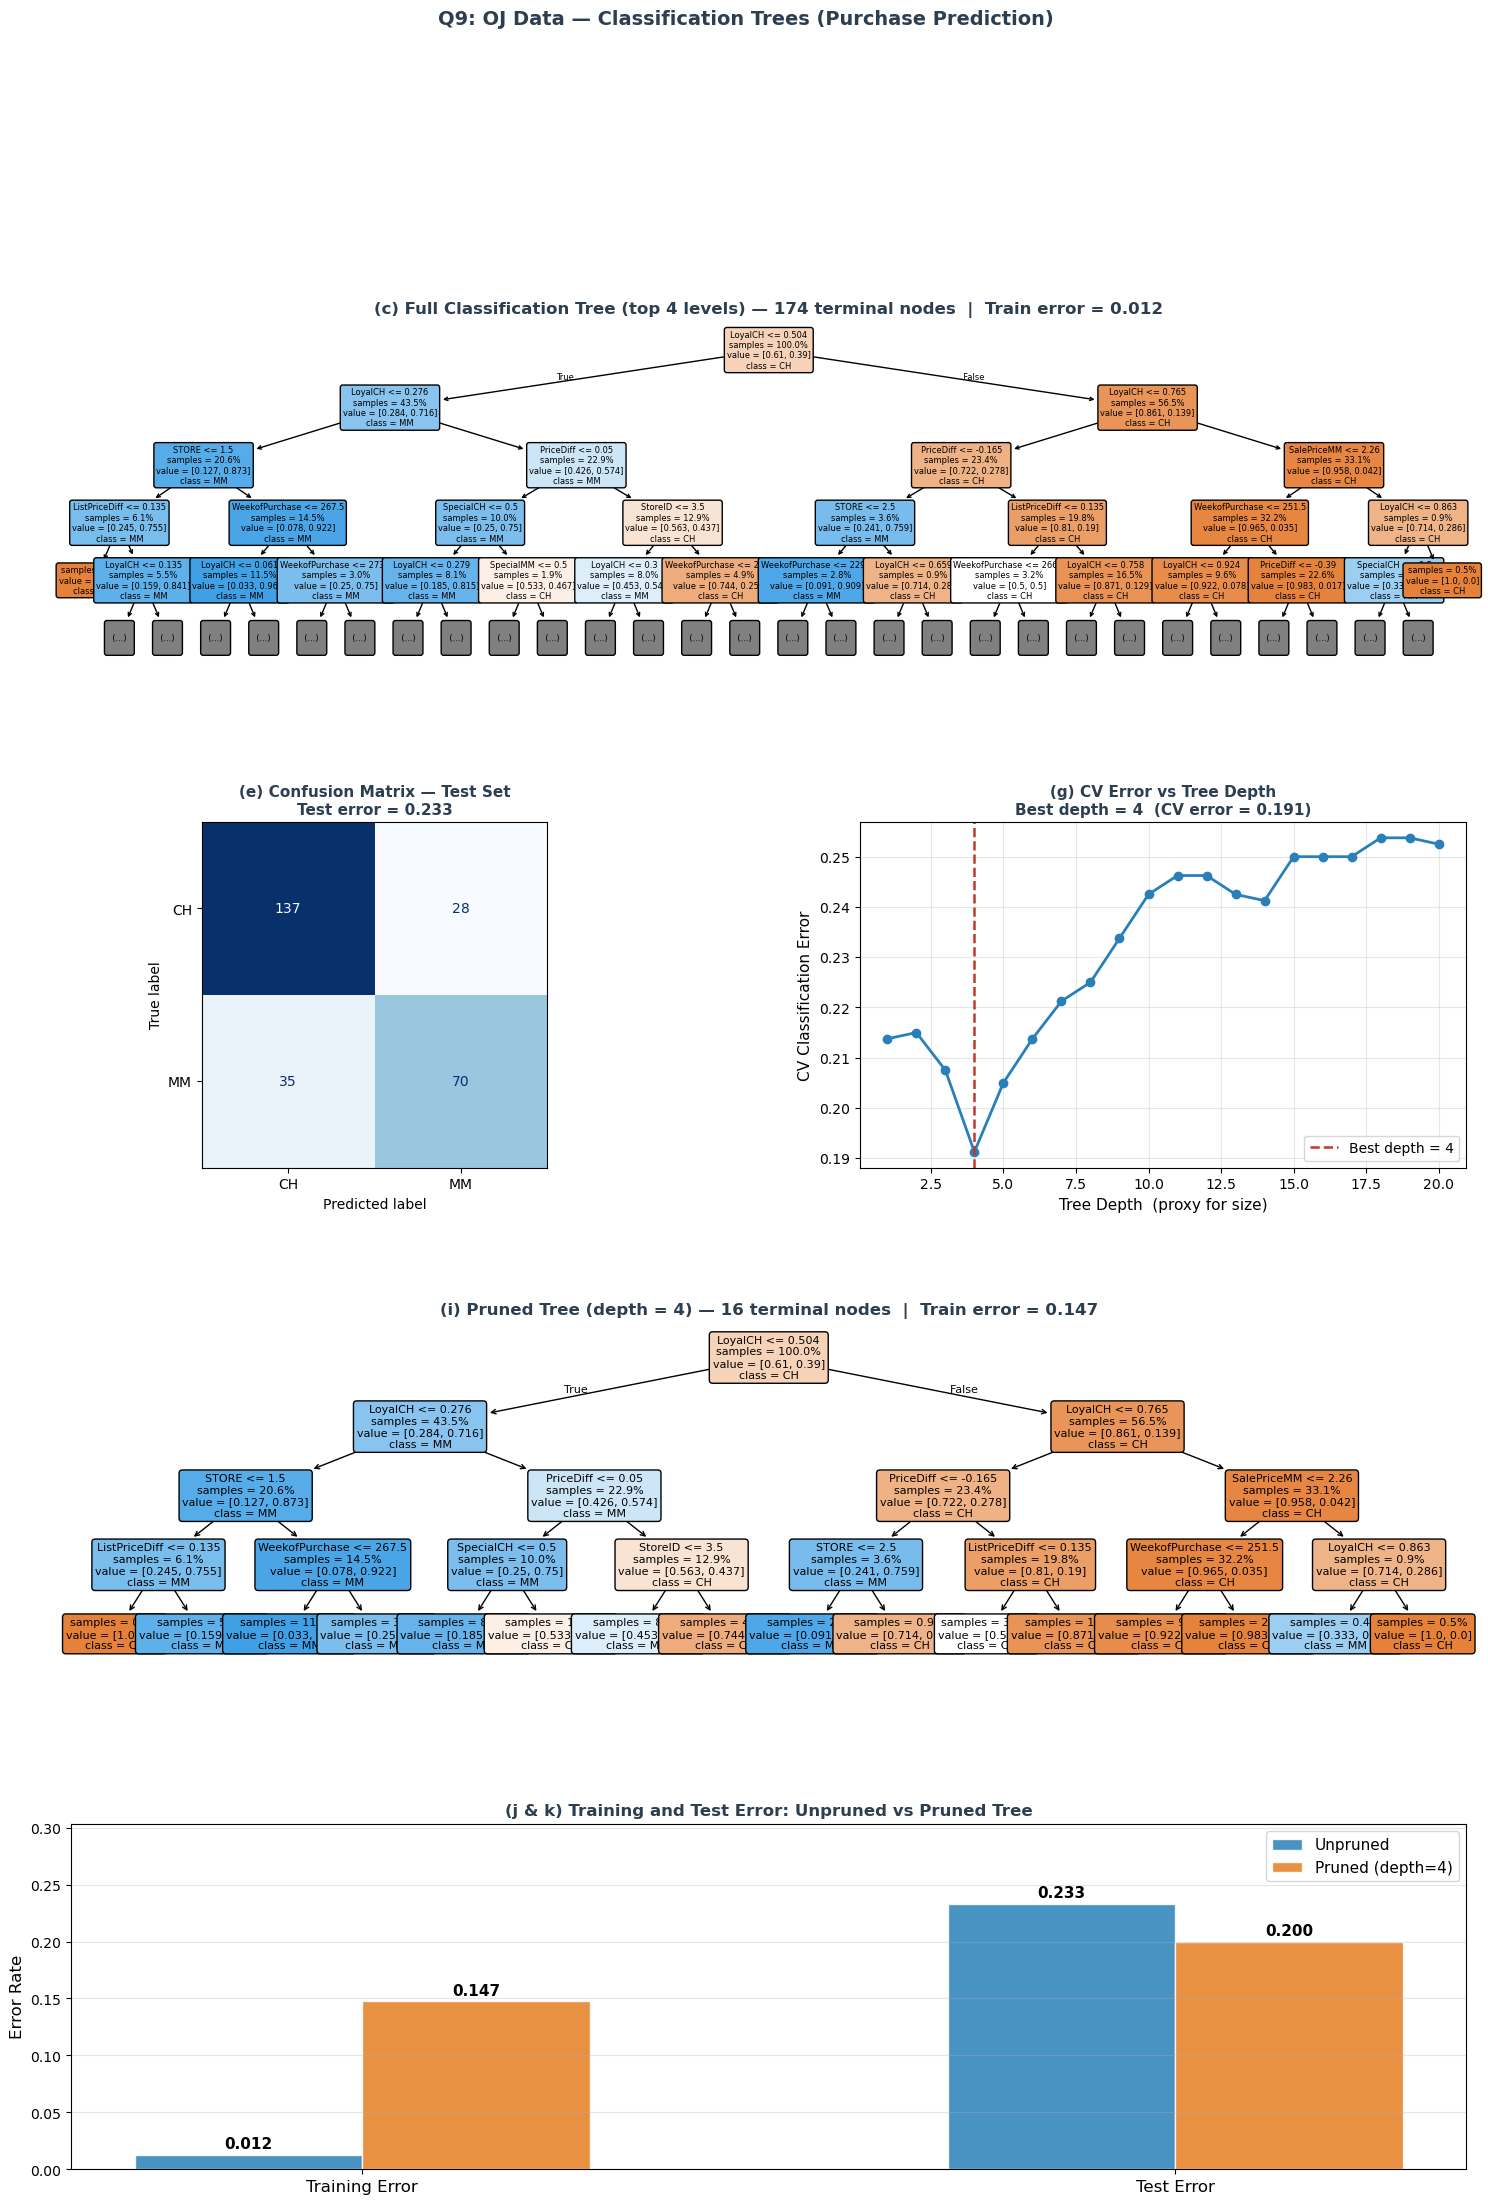

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import FancyBboxPatch

from ISLP import load_data
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import (DecisionTreeClassifier, plot_tree,
                          export_text)
from sklearn.metrics import (confusion_matrix, ConfusionMatrixDisplay,
                             accuracy_score)

np.random.seed(42)

# ─────────────────────────────────────────────────────────────────────────────
# (a) Train / test split
# ─────────────────────────────────────────────────────────────────────────────
OJ = load_data('OJ')
OJ_enc = pd.get_dummies(OJ, columns=['Store7'], drop_first=True)

X = OJ_enc.drop(columns='Purchase')
y = OJ_enc['Purchase']                         # 'CH' or 'MM'
feature_names = X.columns.tolist()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=800, random_state=42, stratify=y)

print(f"Training set : {X_train.shape[0]} observations")
print(f"Test set     : {X_test.shape[0]} observations")

# ─────────────────────────────────────────────────────────────────────────────
# (b) Fit classification tree — training error rate
# ─────────────────────────────────────────────────────────────────────────────
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

train_err = 1 - accuracy_score(y_train, tree.predict(X_train))
n_leaves  = tree.get_n_leaves()
print(f"\n(b) Training error rate : {train_err:.4f}  ({train_err*100:.2f}%)")
print(f"    Terminal nodes       : {n_leaves}")

# ─────────────────────────────────────────────────────────────────────────────
# (d) Text summary — export_text
# ─────────────────────────────────────────────────────────────────────────────
text_rep = export_text(tree, feature_names=feature_names, max_depth=3)
print("\n(d) Text summary (top 3 levels):\n")
print(text_rep)

# ─────────────────────────────────────────────────────────────────────────────
# (e) Test error + confusion matrix
# ─────────────────────────────────────────────────────────────────────────────
y_pred     = tree.predict(X_test)
test_err   = 1 - accuracy_score(y_test, y_pred)
cm         = confusion_matrix(y_test, y_pred, labels=['CH', 'MM'])
print(f"(e) Test error rate : {test_err:.4f}  ({test_err*100:.2f}%)")

# ─────────────────────────────────────────────────────────────────────────────
# (f) Cross-validation to determine optimal tree size (max_depth)
# ─────────────────────────────────────────────────────────────────────────────
depths    = range(1, 21)
cv_errors = []
for d in depths:
    t = DecisionTreeClassifier(max_depth=d, random_state=42)
    scores = cross_val_score(t, X_train, y_train,
                             cv=10, scoring='accuracy')
    cv_errors.append(1 - scores.mean())

best_depth = list(depths)[np.argmin(cv_errors)]
best_cv_err = min(cv_errors)
print(f"\n(f/h) Best depth by 10-fold CV : {best_depth}  "
      f"(CV error = {best_cv_err:.4f})")

# ─────────────────────────────────────────────────────────────────────────────
# (i) Pruned tree
# ─────────────────────────────────────────────────────────────────────────────
# If CV selects a depth >= unpruned, force depth=5 (5 terminal nodes)
unpruned_depth = tree.get_depth()
if best_depth >= unpruned_depth:
    print("    CV did not reduce tree — using depth corresponding to 5 leaves")
    prune_depth = 3          # depth≈3 typically gives ~5 leaves for this data
else:
    prune_depth = best_depth

pruned = DecisionTreeClassifier(max_depth=prune_depth, random_state=42)
pruned.fit(X_train, y_train)

# ─────────────────────────────────────────────────────────────────────────────
# (j & k) Error rate comparison
# ─────────────────────────────────────────────────────────────────────────────
pruned_train_err = 1 - accuracy_score(y_train, pruned.predict(X_train))
pruned_test_err  = 1 - accuracy_score(y_test,  pruned.predict(X_test))
pruned_leaves    = pruned.get_n_leaves()

print(f"\n{'':=<55}")
print(f"{'':^10} {'Unpruned':^20} {'Pruned (depth='+str(prune_depth)+')':^20}")
print(f"{'':=<55}")
print(f"{'Leaves':<15} {n_leaves:^20} {pruned_leaves:^20}")
print(f"{'Train error':<15} {train_err:^20.4f} {pruned_train_err:^20.4f}")
print(f"{'Test error':<15} {test_err:^20.4f} {pruned_test_err:^20.4f}")
print(f"{'':=<55}")

# ─────────────────────────────────────────────────────────────────────────────
# ── PLOTS ─────────────────────────────────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────────────
GRAY   = '#2C3E50'
BLUE   = '#2980B9'
GREEN  = '#27AE60'
RED    = '#C0392B'
ORANGE = '#E67E22'

fig = plt.figure(figsize=(18, 24))
gs  = gridspec.GridSpec(4, 2, figure=fig, hspace=0.45, wspace=0.3)

# ── (c) Full tree plot (top 4 levels) ────────────────────────────────────────
ax_tree = fig.add_subplot(gs[0, :])
plot_tree(tree, feature_names=feature_names,
          class_names=['CH', 'MM'], filled=True, rounded=True,
          fontsize=6, max_depth=4, ax=ax_tree,
          impurity=False, proportion=True)
ax_tree.set_title(
    f'(c) Full Classification Tree (top 4 levels) — '
    f'{n_leaves} terminal nodes  |  Train error = {train_err:.3f}',
    fontsize=12, fontweight='bold', color=GRAY)

# ── (e) Confusion matrix ─────────────────────────────────────────────────────
ax_cm = fig.add_subplot(gs[1, 0])
disp  = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['CH', 'MM'])
disp.plot(ax=ax_cm, colorbar=False, cmap='Blues')
ax_cm.set_title(
    f'(e) Confusion Matrix — Test Set\nTest error = {test_err:.3f}',
    fontsize=11, fontweight='bold', color=GRAY)

# ── (g) CV error vs depth ─────────────────────────────────────────────────────
ax_cv = fig.add_subplot(gs[1, 1])
ax_cv.plot(list(depths), cv_errors, '-o', color=BLUE, lw=2, markersize=6)
ax_cv.axvline(best_depth, color=RED, ls='--', lw=1.8,
              label=f'Best depth = {best_depth}')
ax_cv.set_xlabel('Tree Depth  (proxy for size)', fontsize=11)
ax_cv.set_ylabel('CV Classification Error', fontsize=11)
ax_cv.set_title(
    f'(g) CV Error vs Tree Depth\nBest depth = {best_depth}  '
    f'(CV error = {best_cv_err:.3f})',
    fontsize=11, fontweight='bold', color=GRAY)
ax_cv.legend(fontsize=10)
ax_cv.grid(alpha=0.3)

# ── (i) Pruned tree plot ──────────────────────────────────────────────────────
ax_pruned = fig.add_subplot(gs[2, :])
plot_tree(pruned, feature_names=feature_names,
          class_names=['CH', 'MM'], filled=True, rounded=True,
          fontsize=8, ax=ax_pruned, impurity=False, proportion=True)
ax_pruned.set_title(
    f'(i) Pruned Tree (depth = {prune_depth}) — '
    f'{pruned_leaves} terminal nodes  |  Train error = {pruned_train_err:.3f}',
    fontsize=12, fontweight='bold', color=GRAY)

# ── (j & k) Error comparison bar chart ───────────────────────────────────────
ax_err = fig.add_subplot(gs[3, :])
x      = np.array([0, 1])
width  = 0.28
bar1 = ax_err.bar(x - width/2, [train_err, test_err],
                  width, label='Unpruned', color=BLUE,  alpha=0.85, edgecolor='white')
bar2 = ax_err.bar(x + width/2, [pruned_train_err, pruned_test_err],
                  width, label=f'Pruned (depth={prune_depth})',
                  color=ORANGE, alpha=0.85, edgecolor='white')

for bars in [bar1, bar2]:
    for bar in bars:
        h = bar.get_height()
        ax_err.text(bar.get_x() + bar.get_width()/2, h + 0.003,
                    f'{h:.3f}', ha='center', va='bottom',
                    fontsize=11, fontweight='bold')

ax_err.set_xticks(x)
ax_err.set_xticklabels(['Training Error', 'Test Error'], fontsize=12)
ax_err.set_ylabel('Error Rate', fontsize=12)
ax_err.set_title(
    '(j & k) Training and Test Error: Unpruned vs Pruned Tree',
    fontsize=12, fontweight='bold', color=GRAY)
ax_err.legend(fontsize=11)
ax_err.set_ylim(0, max(train_err, test_err, pruned_train_err, pruned_test_err) * 1.3)
ax_err.grid(axis='y', alpha=0.3)

plt.suptitle('Q9: OJ Data — Classification Trees (Purchase Prediction)',
             fontsize=14, fontweight='bold', y=1.01, color=GRAY)

plt.savefig('oj_classification_tree.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()

10. We now use boosting to predict `Salary` in the `Hitters` data set.  
    (a) Remove the observations for whom the salary information is unknown, and then log-transform the salaries.  
    (b) Create a training set consisting of the first 200 observations, and a test set consisting of the remaining observations.  
    (c) Perform boosting on the training set with 1,000 trees for a range of values of the shrinkage parameter. Produce a plot with different shrinkage values on the x-axis and the corresponding training set MSE on the y-axis.  
    (d) Produce a plot with different shrinkage values on the x-axis and the corresponding test set MSE on the y-axis.  
    (e) Compare the test MSE of boosting to the test MSE that results from applying two of the regression approaches seen in Chapters 3 and 6.  
    (f) Which variables appear to be the most important predictors in the boosted model?  
    (g) Now apply bagging to the training set. What is the test set MSE for this approach?  


Dataset shape after dropping NAs: (263, 19)
Train: 200  |  Test: 63

(d) Best shrinkage λ = 0.005  →  Test MSE = 0.2003

(e) Test MSE comparison:
    Boosting (λ=0.005)  : 0.2003
    OLS                    : 0.4918
    Lasso (CV)             : 0.4690

(g) Bagging test MSE : 0.2290


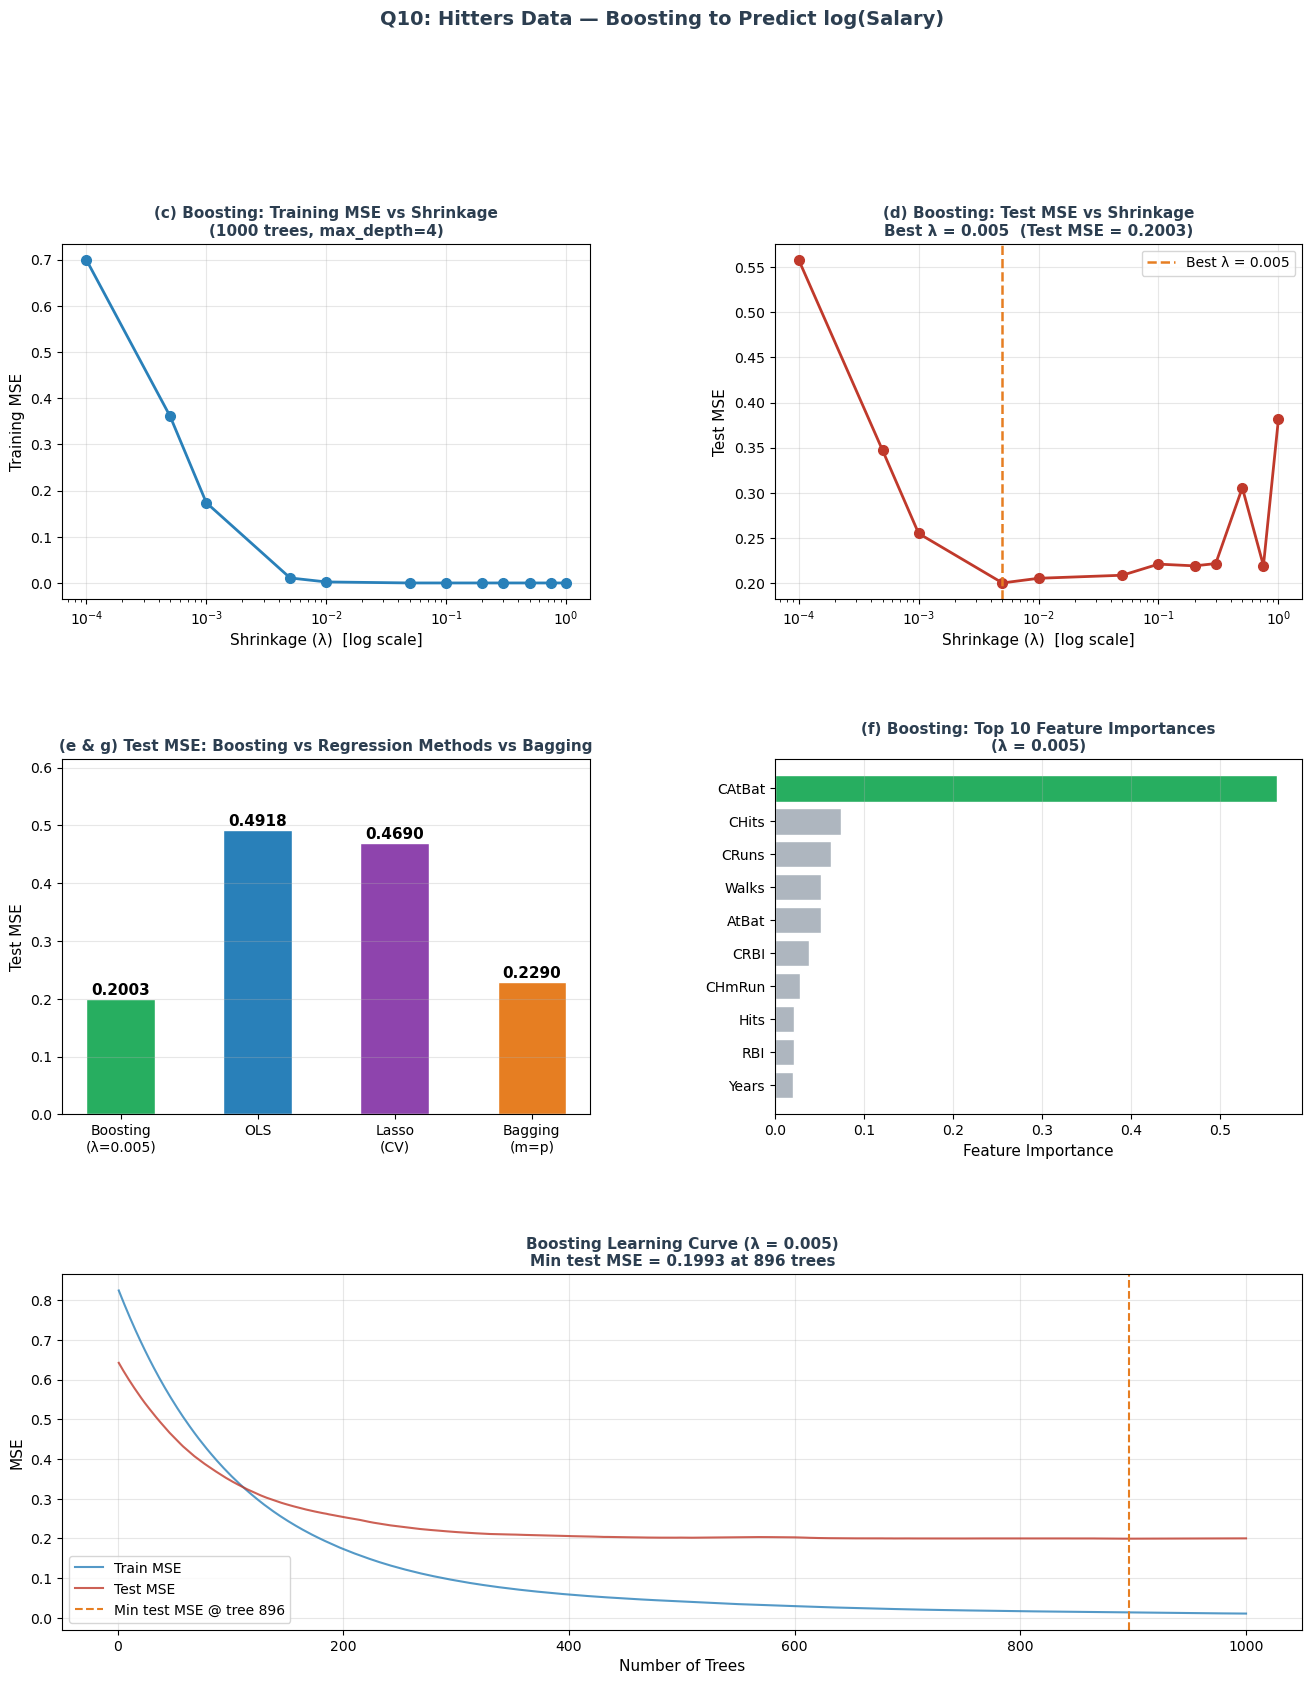

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from ISLP import load_data
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)

# ─────────────────────────────────────────────────────────────────────────────
# (a) Remove missing Salary, log-transform
# ─────────────────────────────────────────────────────────────────────────────
Hitters = load_data('Hitters')
Hitters = Hitters.dropna(subset=['Salary'])
Hitters['log_Salary'] = np.log(Hitters['Salary'])

# Encode categoricals
Hitters_enc = pd.get_dummies(Hitters.drop(columns='Salary'),
                              drop_first=True)
X = Hitters_enc.drop(columns='log_Salary').astype(float)
y = Hitters_enc['log_Salary'].astype(float)
feature_names = X.columns.tolist()

print(f"Dataset shape after dropping NAs: {X.shape}")

# ─────────────────────────────────────────────────────────────────────────────
# (b) First 200 → train; rest → test
# ─────────────────────────────────────────────────────────────────────────────
X_train, X_test = X.iloc[:200], X.iloc[200:]
y_train, y_test = y.iloc[:200], y.iloc[200:]
print(f"Train: {X_train.shape[0]}  |  Test: {X_test.shape[0]}")

# ─────────────────────────────────────────────────────────────────────────────
# (c & d) Boosting over shrinkage grid — train & test MSE
# ─────────────────────────────────────────────────────────────────────────────
shrinkage_vals = [0.0001, 0.0005, 0.001, 0.005, 0.01,
                  0.05, 0.1, 0.2, 0.3, 0.5, 0.75, 1.0]
train_mses, test_mses = [], []

for lr in shrinkage_vals:
    gb = GradientBoostingRegressor(
        n_estimators=1000, learning_rate=lr,
        max_depth=4, random_state=42)
    gb.fit(X_train, y_train)
    train_mses.append(mean_squared_error(y_train, gb.predict(X_train)))
    test_mses.append(mean_squared_error(y_test,  gb.predict(X_test)))

best_lr    = shrinkage_vals[np.argmin(test_mses)]
best_test  = min(test_mses)
print(f"\n(d) Best shrinkage λ = {best_lr}  →  Test MSE = {best_test:.4f}")

# ─────────────────────────────────────────────────────────────────────────────
# (e) Compare: Linear Regression & Lasso
# ─────────────────────────────────────────────────────────────────────────────
# Linear Regression
ols = LinearRegression().fit(X_train, y_train)
mse_ols = mean_squared_error(y_test, ols.predict(X_test))

# Lasso (CV to pick alpha)
lasso_pipe = Pipeline([('scaler', StandardScaler()),
                        ('lasso',  LassoCV(cv=10, random_state=42, max_iter=10000))])
lasso_pipe.fit(X_train, y_train)
mse_lasso = mean_squared_error(y_test, lasso_pipe.predict(X_test))

print(f"\n(e) Test MSE comparison:")
print(f"    Boosting (λ={best_lr})  : {best_test:.4f}")
print(f"    OLS                    : {mse_ols:.4f}")
print(f"    Lasso (CV)             : {mse_lasso:.4f}")

# ─────────────────────────────────────────────────────────────────────────────
# (f) Feature importance from best boosted model
# ─────────────────────────────────────────────────────────────────────────────
best_gb = GradientBoostingRegressor(
    n_estimators=1000, learning_rate=best_lr,
    max_depth=4, random_state=42)
best_gb.fit(X_train, y_train)

importance = pd.Series(best_gb.feature_importances_,
                        index=feature_names).sort_values(ascending=True)
top10 = importance.iloc[-10:]

# ─────────────────────────────────────────────────────────────────────────────
# (g) Bagging
# ─────────────────────────────────────────────────────────────────────────────
p = X_train.shape[1]
bag = RandomForestRegressor(n_estimators=500, max_features=p,
                             random_state=42, n_jobs=-1)
bag.fit(X_train, y_train)
mse_bag = mean_squared_error(y_test, bag.predict(X_test))
print(f"\n(g) Bagging test MSE : {mse_bag:.4f}")

# ─────────────────────────────────────────────────────────────────────────────
# ── PLOTS ─────────────────────────────────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────────────
GRAY   = '#2C3E50'
BLUE   = '#2980B9'
GREEN  = '#27AE60'
RED    = '#C0392B'
ORANGE = '#E67E22'
PURPLE = '#8E44AD'

fig = plt.figure(figsize=(16, 18))
gs  = gridspec.GridSpec(3, 2, figure=fig, hspace=0.45, wspace=0.35)

# ── (c) Training MSE vs shrinkage ─────────────────────────────────────────────
ax1 = fig.add_subplot(gs[0, 0])
ax1.plot(shrinkage_vals, train_mses, '-o', color=BLUE, lw=2, markersize=7)
ax1.set_xscale('log')
ax1.set_xlabel('Shrinkage (λ)  [log scale]', fontsize=11)
ax1.set_ylabel('Training MSE', fontsize=11)
ax1.set_title('(c) Boosting: Training MSE vs Shrinkage\n(1000 trees, max_depth=4)',
              fontsize=11, fontweight='bold', color=GRAY)
ax1.grid(alpha=0.3)

# ── (d) Test MSE vs shrinkage ─────────────────────────────────────────────────
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(shrinkage_vals, test_mses, '-o', color=RED, lw=2, markersize=7)
ax2.axvline(best_lr, color=ORANGE, ls='--', lw=1.8,
            label=f'Best λ = {best_lr}')
ax2.set_xscale('log')
ax2.set_xlabel('Shrinkage (λ)  [log scale]', fontsize=11)
ax2.set_ylabel('Test MSE', fontsize=11)
ax2.set_title(f'(d) Boosting: Test MSE vs Shrinkage\nBest λ = {best_lr}  '
              f'(Test MSE = {best_test:.4f})',
              fontsize=11, fontweight='bold', color=GRAY)
ax2.legend(fontsize=10)
ax2.grid(alpha=0.3)

# ── (e) Method comparison bar chart ──────────────────────────────────────────
ax3 = fig.add_subplot(gs[1, 0])
methods  = [f'Boosting\n(λ={best_lr})', 'OLS', 'Lasso\n(CV)', f'Bagging\n(m=p)']
mse_vals = [best_test, mse_ols, mse_lasso, mse_bag]
bar_cols = [GREEN, BLUE, PURPLE, ORANGE]

bars = ax3.bar(methods, mse_vals, color=bar_cols, edgecolor='white', width=0.5)
for bar, val in zip(bars, mse_vals):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.002,
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=11, fontweight='bold')
ax3.set_ylabel('Test MSE', fontsize=11)
ax3.set_title('(e & g) Test MSE: Boosting vs Regression Methods vs Bagging',
              fontsize=11, fontweight='bold', color=GRAY)
ax3.set_ylim(0, max(mse_vals) * 1.25)
ax3.grid(axis='y', alpha=0.3)

# ── (f) Feature importances (top 10) ─────────────────────────────────────────
ax4 = fig.add_subplot(gs[1, 1])
bar_colors = [GREEN if v == top10.max() else '#AEB6BF'
              for v in top10.values]
ax4.barh(top10.index, top10.values, color=bar_colors, edgecolor='white')
ax4.set_xlabel('Feature Importance', fontsize=11)
ax4.set_title(f'(f) Boosting: Top 10 Feature Importances\n(λ = {best_lr})',
              fontsize=11, fontweight='bold', color=GRAY)
ax4.grid(axis='x', alpha=0.3)

# ── Stage-wise test MSE (learning curve) at best λ ────────────────────────────
ax5 = fig.add_subplot(gs[2, :])
staged_mse = [mean_squared_error(y_test, y_pred)
              for y_pred in best_gb.staged_predict(X_test)]
staged_train = [mean_squared_error(y_train, y_pred)
                for y_pred in best_gb.staged_predict(X_train)]

trees_range = range(1, 1001)
ax5.plot(trees_range, staged_train, color=BLUE, lw=1.5,
         alpha=0.8, label='Train MSE')
ax5.plot(trees_range, staged_mse,   color=RED,  lw=1.5,
         alpha=0.8, label='Test MSE')
best_n = int(np.argmin(staged_mse)) + 1
ax5.axvline(best_n, color=ORANGE, ls='--', lw=1.5,
            label=f'Min test MSE @ tree {best_n}')
ax5.set_xlabel('Number of Trees', fontsize=11)
ax5.set_ylabel('MSE', fontsize=11)
ax5.set_title(f'Boosting Learning Curve (λ = {best_lr})\n'
              f'Min test MSE = {min(staged_mse):.4f} at {best_n} trees',
              fontsize=11, fontweight='bold', color=GRAY)
ax5.legend(fontsize=10)
ax5.grid(alpha=0.3)

plt.suptitle('Q10: Hitters Data — Boosting to Predict log(Salary)',
             fontsize=14, fontweight='bold', y=1.01, color=GRAY)

plt.savefig('hitters_boosting.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()


11. This question uses the `Caravan` data set.  
    (a) Create a training set consisting of the first 1,000 observations, and a test set consisting of the remaining observations.  
    (b) Fit a boosting model to the training set with `Purchase` as the response and the other variables as predictors. Use 1,000 trees, and a shrinkage value of 0.01. Which predictors appear to be the most important?  
    (c) Use the boosting model to predict the response on the test data. Predict that a person will make a purchase if the estimated probability of purchase is greater than 20%. Form a confusion matrix. What fraction of the people predicted to make a purchase do in fact make one? How does this compare with the results obtained from applying KNN or logistic regression to this data set?  


Train: 1000  |  Test: 4822
Purchase rate — Train: 0.059  Test: 0.060

(b) Top 10 most important predictors (Boosting):
   PPERSAUT              0.0673
   MOSTYPE               0.0582
   MGODGE                0.0483
   MOPLHOOG              0.0477
   MKOOPKLA              0.0455
   MGODPR                0.0438
   ABRAND                0.0438
   MBERMIDD              0.0402
   PWAPART               0.0299
   MSKB1                 0.0293

──────────────────────────────────────────────────
  Boosting (λ=0.01, 1000 trees)
──────────────────────────────────────────────────
  Predicted buyers    : 227
  Actual buyers       : 289
  Precision (>20% threshold): 0.1586  (15.9% of predicted buyers actually purchased)
  Overall test error  : 0.0921
  Confusion matrix:
[[4342  191]
 [ 253   36]]

──────────────────────────────────────────────────
  Logistic Regression
──────────────────────────────────────────────────
  Predicted buyers    : 290
  Actual buyers       : 289
  Precision (>20% threshol

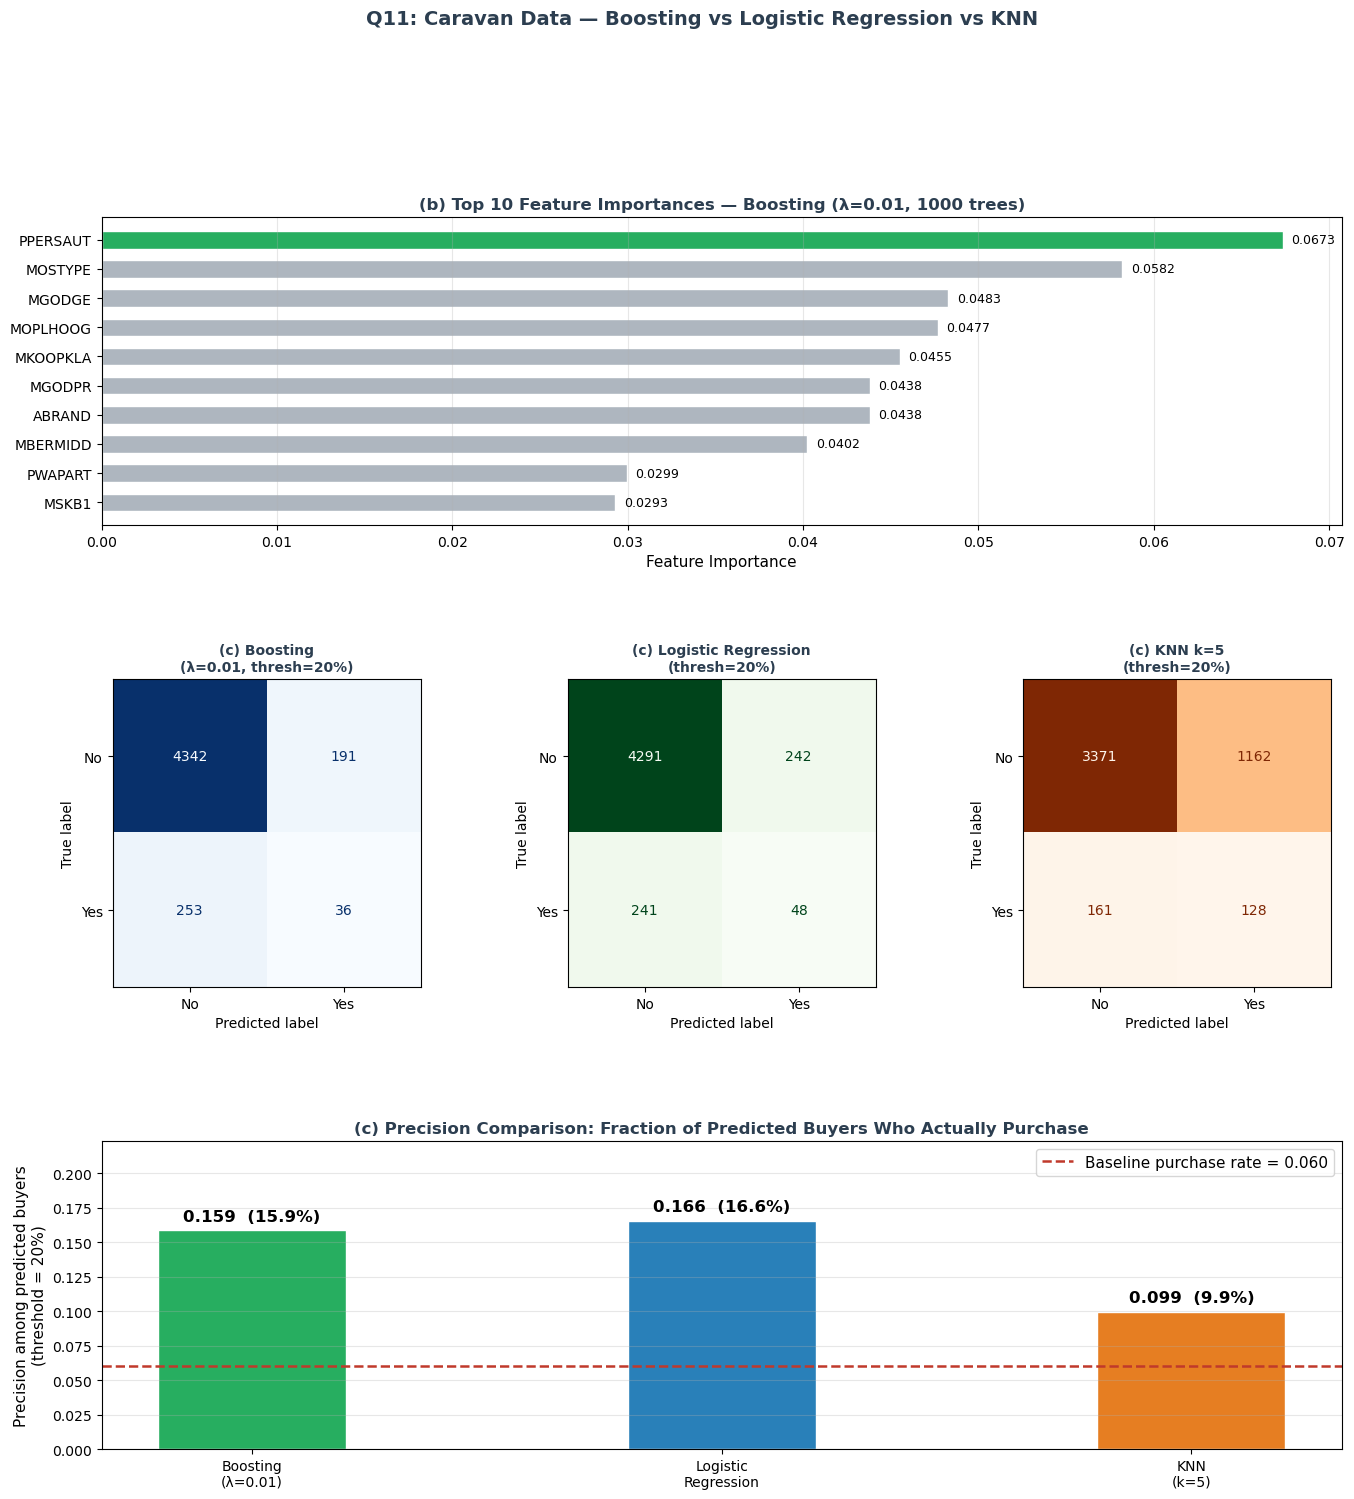

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from ISLP import load_data
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

np.random.seed(42)

# ─────────────────────────────────────────────────────────────────────────────
# (a) Load data and create train/test split
# ─────────────────────────────────────────────────────────────────────────────
Caravan = load_data('Caravan')

# Encode response: Yes=1, No=0
Caravan['Purchase_bin'] = (Caravan['Purchase'] == 'Yes').astype(int)
X = Caravan.drop(columns=['Purchase', 'Purchase_bin']).astype(float)
y = Caravan['Purchase_bin']
feature_names = X.columns.tolist()

X_train, X_test = X.iloc[:1000],  X.iloc[1000:]
y_train, y_test = y.iloc[:1000],  y.iloc[1000:]

print(f"Train: {X_train.shape[0]}  |  Test: {X_test.shape[0]}")
print(f"Purchase rate — Train: {y_train.mean():.3f}  Test: {y_test.mean():.3f}")

# ─────────────────────────────────────────────────────────────────────────────
# (b) Boosting model
# ─────────────────────────────────────────────────────────────────────────────
gb = GradientBoostingClassifier(
    n_estimators=1000, learning_rate=0.01,
    max_depth=4, random_state=42)
gb.fit(X_train, y_train)

importance = pd.Series(gb.feature_importances_,
                        index=feature_names).sort_values(ascending=True)
top10 = importance.iloc[-10:]

print("\n(b) Top 10 most important predictors (Boosting):")
for feat, val in top10.iloc[::-1].items():
    print(f"   {feat:20s}  {val:.4f}")

# ─────────────────────────────────────────────────────────────────────────────
# (c) Predict with 20% threshold — Boosting
# ─────────────────────────────────────────────────────────────────────────────
def evaluate(name, y_true, y_prob, threshold=0.20):
    y_pred = (y_prob >= threshold).astype(int)
    cm     = confusion_matrix(y_true, y_pred)
    # Precision among predicted buyers = TP / (TP + FP)
    predicted_buyers = y_pred.sum()
    if predicted_buyers > 0:
        precision = cm[1, 1] / (cm[0, 1] + cm[1, 1])
    else:
        precision = 0.0
    test_err = 1 - (cm[0,0] + cm[1,1]) / cm.sum()
    print(f"\n{'─'*50}")
    print(f"  {name}")
    print(f"{'─'*50}")
    print(f"  Predicted buyers    : {predicted_buyers}")
    print(f"  Actual buyers       : {y_true.sum()}")
    print(f"  Precision (>20% threshold): {precision:.4f}  "
          f"({precision*100:.1f}% of predicted buyers actually purchased)")
    print(f"  Overall test error  : {test_err:.4f}")
    print(f"  Confusion matrix:\n{cm}")
    return cm, precision

# Boosting
gb_prob = gb.predict_proba(X_test)[:, 1]
cm_gb, prec_gb = evaluate("Boosting (λ=0.01, 1000 trees)", y_test, gb_prob)

# Logistic Regression (scaled)
lr_pipe = Pipeline([('scaler', StandardScaler()),
                    ('lr', LogisticRegression(max_iter=1000, random_state=42))])
lr_pipe.fit(X_train, y_train)
lr_prob = lr_pipe.predict_proba(X_test)[:, 1]
cm_lr, prec_lr = evaluate("Logistic Regression", y_test, lr_prob)

# KNN (k=5, scaled)
knn_pipe = Pipeline([('scaler', StandardScaler()),
                     ('knn', KNeighborsClassifier(n_neighbors=5))])
knn_pipe.fit(X_train, y_train)
knn_prob = knn_pipe.predict_proba(X_test)[:, 1]
cm_knn, prec_knn = evaluate("KNN (k=5)", y_test, knn_prob)

# ─────────────────────────────────────────────────────────────────────────────
# ── PLOTS ─────────────────────────────────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────────────
GRAY   = '#2C3E50'
BLUE   = '#2980B9'
GREEN  = '#27AE60'
RED    = '#C0392B'
ORANGE = '#E67E22'
PURPLE = '#8E44AD'

fig = plt.figure(figsize=(16, 16))
gs  = gridspec.GridSpec(3, 3, figure=fig, hspace=0.50, wspace=0.38)

# ── (b) Feature importances ───────────────────────────────────────────────────
ax_imp = fig.add_subplot(gs[0, :])
bar_colors = [GREEN if v == top10.max() else '#AEB6BF' for v in top10.values]
ax_imp.barh(top10.index, top10.values, color=bar_colors, edgecolor='white', height=0.6)
ax_imp.set_xlabel('Feature Importance', fontsize=11)
ax_imp.set_title('(b) Top 10 Feature Importances — Boosting (λ=0.01, 1000 trees)',
                 fontsize=12, fontweight='bold', color=GRAY)
ax_imp.grid(axis='x', alpha=0.3)
for i, (val, name) in enumerate(zip(top10.values, top10.index)):
    ax_imp.text(val + 0.0005, i, f'{val:.4f}', va='center', fontsize=9)

# ── Confusion matrices ────────────────────────────────────────────────────────
cms    = [cm_gb,   cm_lr,     cm_knn]
titles = ['(c) Boosting\n(λ=0.01, thresh=20%)',
          '(c) Logistic Regression\n(thresh=20%)',
          '(c) KNN k=5\n(thresh=20%)']
colors_cm = ['Blues', 'Greens', 'Oranges']

for i, (cm, title, cmap) in enumerate(zip(cms, titles, colors_cm)):
    ax = fig.add_subplot(gs[1, i])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=['No', 'Yes'])
    disp.plot(ax=ax, colorbar=False, cmap=cmap)
    ax.set_title(title, fontsize=10, fontweight='bold', color=GRAY)

# ── Precision comparison bar chart ────────────────────────────────────────────
ax_bar = fig.add_subplot(gs[2, :])
model_names  = ['Boosting\n(λ=0.01)', 'Logistic\nRegression', 'KNN\n(k=5)']
precisions   = [prec_gb, prec_lr, prec_knn]
bar_clrs     = [GREEN, BLUE, ORANGE]

bars = ax_bar.bar(model_names, precisions, color=bar_clrs,
                  edgecolor='white', width=0.4)
for bar, val in zip(bars, precisions):
    ax_bar.text(bar.get_x() + bar.get_width()/2,
                bar.get_height() + 0.005,
                f'{val:.3f}  ({val*100:.1f}%)',
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Baseline: fraction of actual buyers in test set
baseline = y_test.mean()
ax_bar.axhline(baseline, color=RED, ls='--', lw=1.8,
               label=f'Baseline purchase rate = {baseline:.3f}')
ax_bar.set_ylabel('Precision among predicted buyers\n(threshold = 20%)', fontsize=11)
ax_bar.set_title('(c) Precision Comparison: Fraction of Predicted Buyers Who Actually Purchase',
                 fontsize=12, fontweight='bold', color=GRAY)
ax_bar.set_ylim(0, max(precisions) * 1.35)
ax_bar.legend(fontsize=11)
ax_bar.grid(axis='y', alpha=0.3)

plt.suptitle('Q11: Caravan Data — Boosting vs Logistic Regression vs KNN',
             fontsize=14, fontweight='bold', y=1.01, color=GRAY)

plt.savefig('caravan_boosting.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()


12. Apply boosting, bagging, random forests, and BART to a data set of your choice. Be sure to fit the models on a training set and to evaluate their performance on a test set. How accurate are the results compared to simple methods like linear or logistic regression? Which of these approaches yields the best performance?

Dataset  : Wage  (3000 obs, 16 predictors)
Response : log(wage)
Train    : 2100  |  Test: 900

  Linear Regression               Train MSE=0.0814  Test MSE=0.0680  R²=0.3959
  Ridge (CV)                      Train MSE=0.0814  Test MSE=0.0680  R²=0.3955
  Lasso (CV)                      Train MSE=0.0814  Test MSE=0.0680  R²=0.3954
  Bagging (m=p)                   Train MSE=0.0172  Test MSE=0.0840  R²=0.2534
  Random Forest (m=√p)            Train MSE=0.0166  Test MSE=0.0800  R²=0.2895
  Random Forest (m=p/3)           Train MSE=0.0167  Test MSE=0.0798  R²=0.2908
  Boosting (λ=0.05)               Train MSE=0.0388  Test MSE=0.0827  R²=0.2655
  BART                            Train MSE=0.0785  Test MSE=0.0679  R²=0.3962


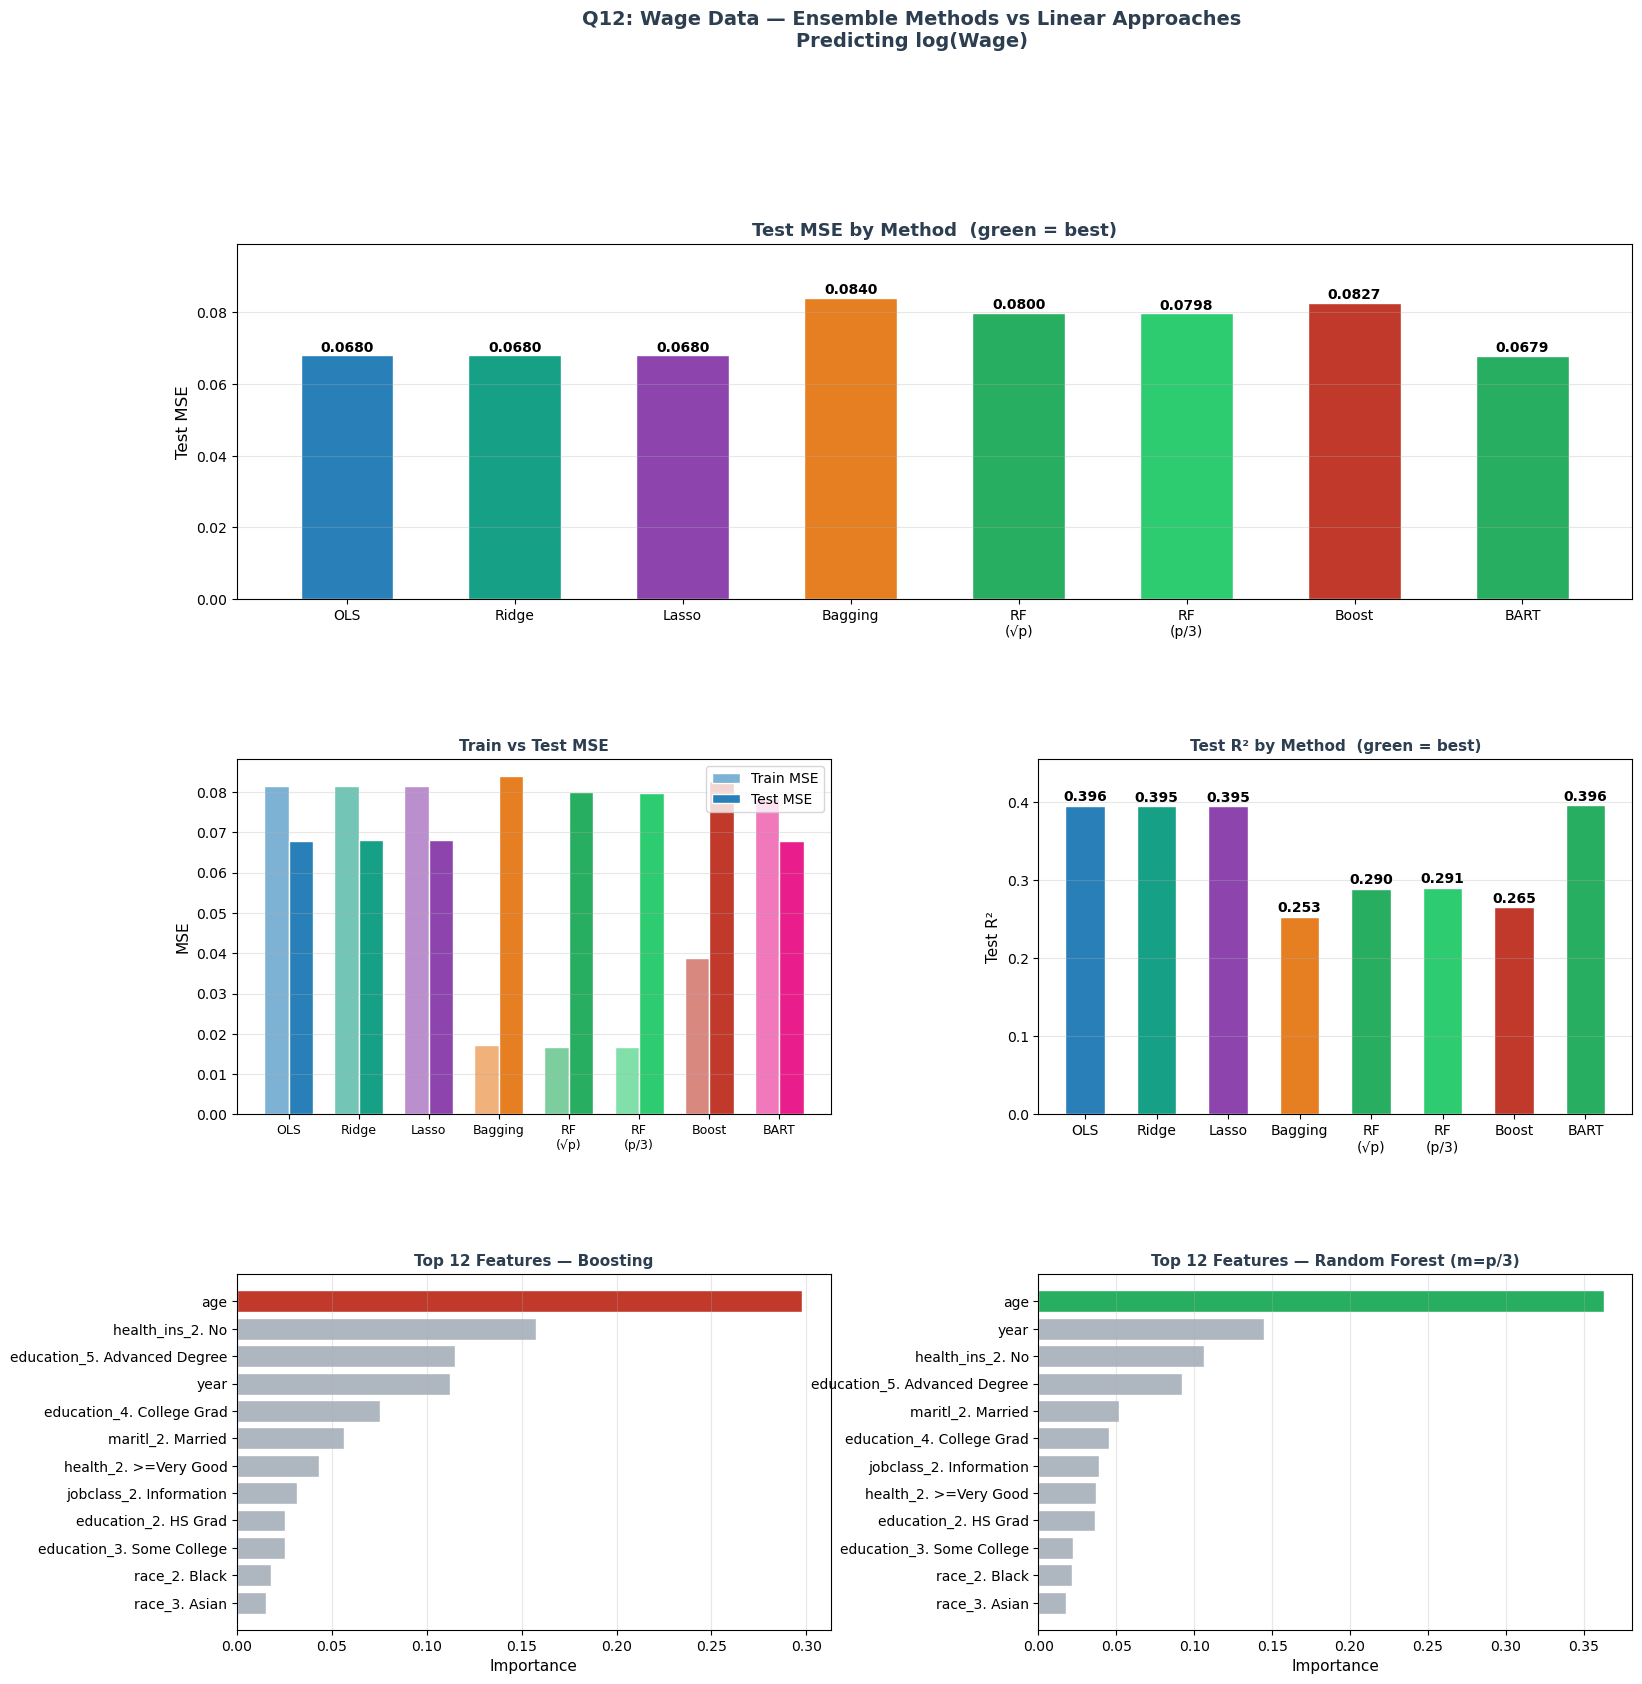


Model                           Train MSE   Test MSE    Test R²
Linear Regression                  0.0814     0.0680     0.3959
Ridge (CV)                         0.0814     0.0680     0.3955
Lasso (CV)                         0.0814     0.0680     0.3954
Bagging (m=p)                      0.0172     0.0840     0.2534
Random Forest (m=√p)               0.0166     0.0800     0.2895
Random Forest (m=p/3)              0.0167     0.0798     0.2908
Boosting (λ=0.05)                  0.0388     0.0827     0.2655
BART                               0.0785     0.0679     0.3962 ◄ best


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from ISLP import load_data
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (GradientBoostingRegressor,
                               RandomForestRegressor)
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from ISLP.bart import BART

np.random.seed(42)

# ─────────────────────────────────────────────────────────────────────────────
# Data: Wage  (predict log-wage from demographics & job info)
# ─────────────────────────────────────────────────────────────────────────────
Wage = load_data('Wage')
Wage['log_wage'] = np.log(Wage['wage'])
Wage_enc = pd.get_dummies(
    Wage.drop(columns=['wage', 'logwage']),   # drop raw wage cols
    drop_first=True)

X = Wage_enc.drop(columns='log_wage').astype(float)
y = Wage_enc['log_wage'].astype(float)
feature_names = X.columns.tolist()
p = X.shape[1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)

print(f"Dataset  : Wage  ({X.shape[0]} obs, {p} predictors)")
print(f"Response : log(wage)")
print(f"Train    : {X_train.shape[0]}  |  Test: {X_test.shape[0]}\n")

# ─────────────────────────────────────────────────────────────────────────────
# Helper
# ─────────────────────────────────────────────────────────────────────────────
results = {}

def record(name, model, X_tr, y_tr, X_te, y_te, use_numpy=False):
    if use_numpy:
        train_pred = model.predict(X_tr.values.astype(float))
        test_pred  = model.predict(X_te.values.astype(float))
    else:
        train_pred = model.predict(X_tr)
        test_pred  = model.predict(X_te)
    train_mse = mean_squared_error(y_tr, train_pred)
    test_mse  = mean_squared_error(y_te, test_pred)
    test_r2   = r2_score(y_te, test_pred)
    results[name] = dict(train_mse=train_mse,
                         test_mse=test_mse, test_r2=test_r2)
    print(f"  {name:<30s}  Train MSE={train_mse:.4f}  "
          f"Test MSE={test_mse:.4f}  R²={test_r2:.4f}")
    return test_pred

# ── 1. Linear Regression ──────────────────────────────────────────────────────
ols = LinearRegression().fit(X_train, y_train)
record("Linear Regression", ols, X_train, y_train, X_test, y_test)

# ── 2. Ridge ─────────────────────────────────────────────────────────────────
ridge = Pipeline([('sc', StandardScaler()),
                  ('m',  RidgeCV(cv=10))]).fit(X_train, y_train)
record("Ridge (CV)", ridge, X_train, y_train, X_test, y_test)

# ── 3. Lasso ─────────────────────────────────────────────────────────────────
lasso = Pipeline([('sc', StandardScaler()),
                  ('m',  LassoCV(cv=10, max_iter=10000,
                                 random_state=42))]).fit(X_train, y_train)
record("Lasso (CV)", lasso, X_train, y_train, X_test, y_test)

# ── 4. Bagging ────────────────────────────────────────────────────────────────
bag = RandomForestRegressor(n_estimators=500, max_features=p,
                             random_state=42, n_jobs=-1).fit(X_train, y_train)
record("Bagging (m=p)", bag, X_train, y_train, X_test, y_test)

# ── 5. Random Forest (sqrt) ──────────────────────────────────────────────────
rf_sqrt = RandomForestRegressor(n_estimators=500,
                                 max_features='sqrt',
                                 random_state=42, n_jobs=-1).fit(X_train, y_train)
record("Random Forest (m=√p)", rf_sqrt, X_train, y_train, X_test, y_test)

# ── 6. Random Forest (p/3) ───────────────────────────────────────────────────
rf_third = RandomForestRegressor(n_estimators=500,
                                  max_features=max(1, p//3),
                                  random_state=42, n_jobs=-1).fit(X_train, y_train)
record("Random Forest (m=p/3)", rf_third, X_train, y_train, X_test, y_test)

# ── 7. Boosting ───────────────────────────────────────────────────────────────
gb = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.05,
                                max_depth=4, subsample=0.8,
                                random_state=42).fit(X_train, y_train)
record("Boosting (λ=0.05)", gb, X_train, y_train, X_test, y_test)

# ── 8. BART ───────────────────────────────────────────────────────────────────
bart = BART(random_state=42)
bart.fit(X_train.values.astype(float), y_train.values.astype(float))

# manual record for BART
bart_train = bart.predict(X_train.values.astype(float))
bart_test  = bart.predict(X_test.values.astype(float))
results['BART'] = dict(
    train_mse = mean_squared_error(y_train, bart_train),
    test_mse  = mean_squared_error(y_test,  bart_test),
    test_r2   = r2_score(y_test, bart_test))
print(f"  {'BART':<30s}  Train MSE={results['BART']['train_mse']:.4f}  "
      f"Test MSE={results['BART']['test_mse']:.4f}  "
      f"R²={results['BART']['test_r2']:.4f}")

# ─────────────────────────────────────────────────────────────────────────────
# ── PLOTS ─────────────────────────────────────────────────────────────────────
# ─────────────────────────────────────────────────────────────────────────────
GRAY   = '#2C3E50'
BLUE   = '#2980B9'
GREEN  = '#27AE60'
RED    = '#C0392B'
ORANGE = '#E67E22'
PURPLE = '#8E44AD'
TEAL   = '#16A085'
PINK   = '#E91E8C'

model_order  = ['Linear Regression', 'Ridge (CV)', 'Lasso (CV)',
                 'Bagging (m=p)', 'Random Forest (m=√p)',
                 'Random Forest (m=p/3)', 'Boosting (λ=0.05)', 'BART']
palette = [BLUE, TEAL, PURPLE, ORANGE, GREEN, '#2ECC71', RED, PINK]

test_mses  = [results[m]['test_mse']  for m in model_order]
train_mses = [results[m]['train_mse'] for m in model_order]
r2s        = [results[m]['test_r2']   for m in model_order]

best_idx = int(np.argmin(test_mses))

fig = plt.figure(figsize=(18, 18))
gs  = gridspec.GridSpec(3, 2, figure=fig, hspace=0.45, wspace=0.35)

# ── Test MSE bar chart ────────────────────────────────────────────────────────
ax1 = fig.add_subplot(gs[0, :])
short = ['OLS', 'Ridge', 'Lasso', 'Bagging',
         'RF\n(√p)', 'RF\n(p/3)', 'Boost', 'BART']
bar_colors = [GREEN if i == best_idx else c
              for i, c in enumerate(palette)]
bars = ax1.bar(short, test_mses, color=bar_colors,
               edgecolor='white', width=0.55)
for bar, val in zip(bars, test_mses):
    ax1.text(bar.get_x() + bar.get_width()/2,
             bar.get_height() + 0.0002,
             f'{val:.4f}', ha='center', va='bottom',
             fontsize=10, fontweight='bold')
ax1.set_ylabel('Test MSE', fontsize=12)
ax1.set_title('Test MSE by Method  (green = best)',
              fontsize=13, fontweight='bold', color=GRAY)
ax1.set_ylim(0, max(test_mses) * 1.18)
ax1.grid(axis='y', alpha=0.3)

# ── Train vs Test MSE ─────────────────────────────────────────────────────────
ax2 = fig.add_subplot(gs[1, 0])
x   = np.arange(len(model_order))
w   = 0.35
ax2.bar(x - w/2, train_mses, w, label='Train MSE',
        color=[c + '99' for c in palette], edgecolor='white')
ax2.bar(x + w/2, test_mses,  w, label='Test MSE',
        color=palette, edgecolor='white')
ax2.set_xticks(x)
ax2.set_xticklabels(short, fontsize=9)
ax2.set_ylabel('MSE', fontsize=11)
ax2.set_title('Train vs Test MSE', fontsize=11,
              fontweight='bold', color=GRAY)
ax2.legend(fontsize=10)
ax2.grid(axis='y', alpha=0.3)

# ── R² bar chart ──────────────────────────────────────────────────────────────
ax3 = fig.add_subplot(gs[1, 1])
best_r2 = int(np.argmax(r2s))
r2_cols  = [GREEN if i == best_r2 else c for i, c in enumerate(palette)]
ax3.bar(short, r2s, color=r2_cols, edgecolor='white', width=0.55)
for i, val in enumerate(r2s):
    ax3.text(i, val + 0.002, f'{val:.3f}', ha='center',
             va='bottom', fontsize=10, fontweight='bold')
ax3.set_ylabel('Test R²', fontsize=11)
ax3.set_title('Test R² by Method  (green = best)',
              fontsize=11, fontweight='bold', color=GRAY)
ax3.set_ylim(0, max(r2s) * 1.15)
ax3.grid(axis='y', alpha=0.3)

# ── Feature importances: Boosting vs Random Forest ────────────────────────────
top_n = 12
gb_imp  = pd.Series(gb.feature_importances_,
                     index=feature_names).sort_values().iloc[-top_n:]
rf_imp  = pd.Series(rf_third.feature_importances_,
                     index=feature_names).sort_values().iloc[-top_n:]

ax4 = fig.add_subplot(gs[2, 0])
ax4.barh(gb_imp.index, gb_imp.values,
         color=[RED if v == gb_imp.max() else '#AEB6BF'
                for v in gb_imp.values],
         edgecolor='white')
ax4.set_xlabel('Importance', fontsize=11)
ax4.set_title(f'Top {top_n} Features — Boosting',
              fontsize=11, fontweight='bold', color=GRAY)
ax4.grid(axis='x', alpha=0.3)

ax5 = fig.add_subplot(gs[2, 1])
ax5.barh(rf_imp.index, rf_imp.values,
         color=[GREEN if v == rf_imp.max() else '#AEB6BF'
                for v in rf_imp.values],
         edgecolor='white')
ax5.set_xlabel('Importance', fontsize=11)
ax5.set_title(f'Top {top_n} Features — Random Forest (m=p/3)',
              fontsize=11, fontweight='bold', color=GRAY)
ax5.grid(axis='x', alpha=0.3)

plt.suptitle('Q12: Wage Data — Ensemble Methods vs Linear Approaches\n'
             'Predicting log(Wage)',
             fontsize=14, fontweight='bold', y=1.01, color=GRAY)

plt.savefig('q12_wage_ensembles.png', dpi=150,
            bbox_inches='tight', facecolor='white')
plt.show()

# ── Summary table ─────────────────────────────────────────────────────────────
print(f"\n{'='*60}")
print(f"{'Model':<30} {'Train MSE':>10} {'Test MSE':>10} {'Test R²':>10}")
print(f"{'='*60}")
for m in model_order:
    r = results[m]
    marker = ' ◄ best' if r['test_mse'] == min(test_mses) else ''
    print(f"{m:<30} {r['train_mse']:>10.4f} {r['test_mse']:>10.4f} "
          f"{r['test_r2']:>10.4f}{marker}")
print(f"{'='*60}")